---
#### Import data

In [86]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import os
os.chdir('/content/drive/MyDrive/zerobase/TeamPJ')
os.getcwd()

'/content/drive/MyDrive/zerobase/TeamPJ'

In [88]:
import pandas as pd
df = pd.read_csv('shopping_trends_updated.csv')
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

---
#### Checking Basic Information of the Data

In [89]:
df.shape

(3900, 18)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [91]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [92]:
df['Customer ID'].nunique()

3900

✅ There are no null values, and the data types are appropriately classified as numeric and object. Based on the number of unique values in the customer ID column, we can infer that the dataset contains purchase data from 3,900 distinct customers.

___
#### Examine the unique categories in categorical columns

In [93]:
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [94]:
# Define "df_object"
df_object=df[['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases']]

# Aggregate the DataFrame to collect unique values in each column and convert them to strings
unique_values_df = df_object.agg(lambda x: ', '.join(sorted(x.astype(str).unique()))).to_frame().reset_index()

# Count the unique values
unique_values_counts = df_object.agg(lambda x: x.nunique()).to_frame().reset_index()

# Merge unique values and their counts into a single DataFrame
unique_values_df = unique_values_df.merge(unique_values_counts, on='index')

# Rename the columns for clarity
unique_values_df.columns = ['Column Name', 'Unique Values', 'Unique Values Count']

# Set pandas to display the full content of each column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
unique_values_df

Column Name  \
0                   Gender   
1           Item Purchased   
2                 Category   
3                 Location   
4                     Size   
5                    Color   
6                   Season   
7      Subscription Status   
8            Shipping Type   
9         Discount Applied   
10         Promo Code Used   
11          Payment Method   
12  Frequency of Purchases   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Unique Values  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Female, Male   
1                                                                                                                                                                                                                                                                                                                                        Backpack, Belt, Blouse, Boots, Coat, Dress, Gloves, Handbag, Hat, Hoodie, Jacket, Jeans, Jewelry, Pants, Sandals, Scarf, Shirt, Shoes, Shorts, Skirt, Sneakers, Socks, Sunglasses, Sweater, T-shirt   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Accessories, Clothing, Footwear, Outerwear   
3   Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                L, M, S, XL   
5                                                                                                                                                                                                                                                                                                                                                   Beige, Black, Blue, Brown, Charcoal, Cyan, Gold, Gray, Green, Indigo, Lavender, Magent

In [95]:
df.groupby('Category')['Item Purchased'].unique().to_frame()

Item Purchased
Category                                                                                         
Accessories                    [Handbag, Sunglasses, Jewelry, Scarf, Hat, Backpack, Belt, Gloves]
Clothing     [Blouse, Sweater, Jeans, Shirt, Shorts, Dress, Skirt, Pants, Hoodie, T-shirt, Socks]
Footwear                                                        [Sandals, Sneakers, Shoes, Boots]
Outerwear                                                                          [Coat, Jacket]

In [96]:
# Detect items that are listed under multiple product categories,

unique_items_by_category = df.groupby('Category')['Item Purchased'].unique().to_frame(name='Items')
all_items = unique_items_by_category.explode('Items')
item_counts = all_items['Items'].value_counts()
duplicates = item_counts[item_counts > 1].index.tolist()

print(duplicates)

[]


In [97]:
unique_items_by_category

Items
Category                                                                                         
Accessories                    [Handbag, Sunglasses, Jewelry, Scarf, Hat, Backpack, Belt, Gloves]
Clothing     [Blouse, Sweater, Jeans, Shirt, Shorts, Dress, Skirt, Pants, Hoodie, T-shirt, Socks]
Footwear                                                        [Sandals, Sneakers, Shoes, Boots]
Outerwear                                                                          [Coat, Jacket]

In [98]:
all_items

Items
Category               
Accessories     Handbag
Accessories  Sunglasses
Accessories     Jewelry
Accessories       Scarf
Accessories         Hat
Accessories    Backpack
Accessories        Belt
Accessories      Gloves
Clothing         Blouse
Clothing        Sweater
Clothing          Jeans
Clothing          Shirt
Clothing         Shorts
Clothing          Dress
Clothing          Skirt
Clothing          Pants
Clothing         Hoodie
Clothing        T-shirt
Clothing          Socks
Footwear        Sandals
Footwear       Sneakers
Footwear          Shoes
Footwear          Boots
Outerwear          Coat
Outerwear        Jacket

In [99]:
item_counts

Items
Handbag       1
Sunglasses    1
Jewelry       1
Scarf         1
Hat           1
Backpack      1
Belt          1
Gloves        1
Blouse        1
Sweater       1
Jeans         1
Shirt         1
Shorts        1
Dress         1
Skirt         1
Pants         1
Hoodie        1
T-shirt       1
Socks         1
Sandals       1
Sneakers      1
Shoes         1
Boots         1
Coat          1
Jacket        1
Name: count, dtype: int64

> ✅ Category and Item Purchased have a hierarchical relationship, and
no item is redundantly classified under multiple categories.

In [100]:
# Analyze the number of distinct color options available for each item.

unique_colors_by_item = df.groupby('Item Purchased')['Color'].unique().to_frame(name='Unique Colors')

unique_colors_by_item['Unique Color Count'] = unique_colors_by_item['Unique Colors'].apply(len)

unique_colors_by_item.reset_index(inplace=True)
unique_colors_by_item

Item Purchased  \
0        Backpack   
1            Belt   
2          Blouse   
3           Boots   
4            Coat   
5           Dress   
6          Gloves   
7         Handbag   
8             Hat   
9          Hoodie   
10         Jacket   
11          Jeans   
12        Jewelry   
13          Pants   
14        Sandals   
15          Scarf   
16          Shirt   
17          Shoes   
18         Shorts   
19          Skirt   
20       Sneakers   
21          Socks   
22     Sunglasses   
23        Sweater   
24        T-shirt   

                                                                                                                                                                                 Unique Colors  \
0   [Brown, Purple, Charcoal, Black, Orange, Olive, Lavender, Gray, Beige, Cyan, Violet, Peach, Red, Maroon, Gold, Blue, White, Silver, Yellow, Indigo, Turquoise, Teal, Magenta, Pink, Green]   
1   [Yellow, Cyan, Magenta, Purple, Silver, Indigo, Blue, Charcoal, Olive, Turquoise, Green, Orange, Pink, Brown, Gray, Red, Gold, Maroon, Black, Beige, Teal, Lavender, Peach, White, Violet]   
2   [Gray, Turquoise, Cyan, Red, Magenta, White, Maroon, Beige, Blue, Charcoal, Lavender, Gold, Indigo, Teal, Black, Silver, Brown, Pink, Yellow, Peach, Green, Purple, Violet, Olive, Orange]   
3   [Green, Red, Cyan, Violet, Lavender, Purple, Silver, Olive, Beige, Yellow, Indigo, Teal, Brown, Pink, Maroon, Charcoal, White, Black, Magenta, Peach, Gold, Turquoise, Orange, Blue, Gray]   
4   [Silver, Gold, Teal, Beige, Brown, White, Gray, Peach, Blue, Orange, Violet, Green, Yellow, Olive, Lavender, Cyan, Magenta, Indigo, Red, Charcoal, Pink, Purple, Turquoise, Black, Maroon]   
5   [Violet, Lavender, Black, Brown, Red, Gold, Olive, Turquoise, Charcoal, Teal, Beige, Green, Yellow, Pink, Cyan, Orange, Maroon, Blue, White, Purple, Peach, Silver, Gray, Magenta, Indigo]   
6   [Violet, Gold, Red, Turquoise, Gray, Charcoal, Orange, Green, Purple, Silver, Lavender, Indigo, Peach, Yellow, Blue, Pink, White, Teal, Magenta, Cyan, Black, Beige, Olive, Maroon, Brown]   
7   [Pink, Gray, Beige, Silver, Purple, Yellow, Blue, Peach, Teal, Gold, Red, White, Charcoal, Orange, Cyan, Green, Indigo, Olive, Turquoise, Black, Lavender, Magenta, Brown, Maroon, Violet]   
8   [Silver, Teal, Violet, Maroon, Red, Gray, Yellow, Turquoise, Green, Magenta, Orange, Blue, Cyan, Black, Peach, Lavender, Charcoal, Brown, Indigo, Olive, Beige, Purple, White, Pink, Gold]   
9   [Silver, Indigo, Charcoal, Pink, Maroon, Magenta, Peach, Orange, Teal, Gray, White, Brown, Olive, Blue, Purple, Turquoise, Black, Lavender, Red, Green, Beige, Violet, Cyan, Gold, Yellow]   
10  [Green, Silver, Lavender, Olive, Pink, White, Violet, Gold, Magenta, Teal, Blue, Yellow, Turquoise, Red, Maroon, Gray, Cyan, Black, Brown, Charcoal, Orange, Beige, Indigo, Purple, Peach]   
11  [Maroon, Cyan, Teal, Turquoise, Gold, Magenta, Orange, Silver, Violet, Yellow, Peach, Indigo, Gray, Blue, Beige, Green, Pink, Charcoal, Olive, White, Purple, Red, Black, Brown, Lavender]   
12  [Red, Black, Charcoal, Teal, Violet, Turquoise, Purple, Olive, White, Beige, Indigo, Gray, Orange, Magenta, Lavender, Brown, Peach, Pink, Yellow, Gold, Silver, Cyan, Maroon, Blue, Green]   
13  [Green, Black, Charcoal, Peach, White, Turquoise, Teal, Olive, Beige, Yellow, Purple, Violet, Cyan, Red, Pink, Orange, Indigo, Maroon, Blue, Lavender, Silver, Gold, Brown, Gray, Magenta]   
14  [Maroon, Blue, Yellow, Purple, Green, Olive, Silver, Charcoal, Cyan, Lavender, Turquoise, Red, Beige, Gold, Orange, Pink, Violet, Black, Gray, Peach, Teal, Indigo, Magenta, White, Brown]   
15  [Orange, Lavender, Blue, Green, Gold, Violet, Black, Yellow, Olive, Charcoal, White, Silver, Beige, Teal, Magenta, Peach, Indigo, Cyan, Brown, Turquoise, Pink, Purple, Gray, Red, Maroon]   
16  [Gray, White, Orange, Yellow, Brown, Teal, Maroon, Silver, Green, Olive, Beige, Violet, Indigo, Black, Gold, Purple, Peach, Blue, Pink, Magenta, Cyan, Lav

> ✅ Every item is manufactured in 25 distinct color variants.

---
#### Classify customer loyalty based on the number of previous purchases, and analyze purchasing behavior by loyalty group.


In [101]:
import numpy as np

# Get unique values from 'Previous Purchases' and sort them
sorted_unique_purchases = np.sort(df['Previous Purchases'].unique())
print(sorted_unique_purchases)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [102]:
df['Previous Purchases'].nunique()

50

> ✅ Previous Purchases contains integer values ranging from 1 to 50, with no missing values in between.

In [103]:
sorted_unique_amt = np.sort(df['Purchase Amount (USD)'].unique())
print(sorted_unique_amt)

print(df['Purchase Amount (USD)'].nunique())

[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]
81


> ✅ Purchase Amount contains integer values ranging from 20 to 100, with no missing values in between.

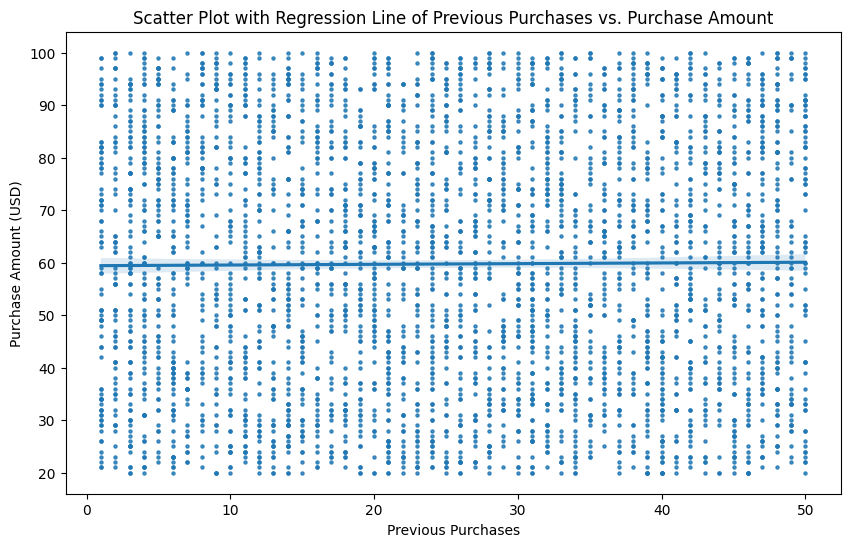

Correlation coefficient: 0.008063412270587735


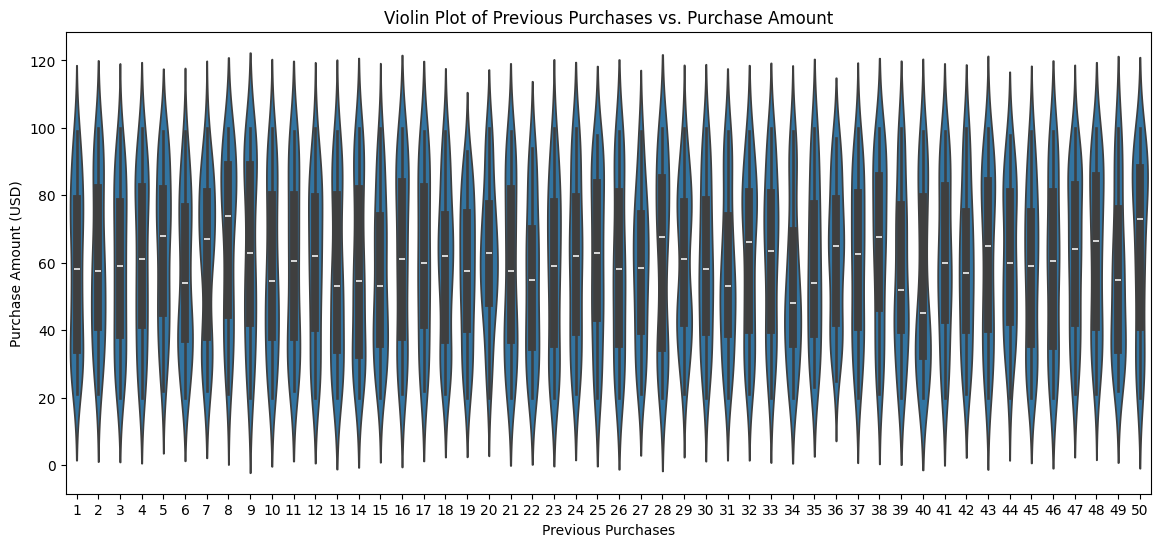

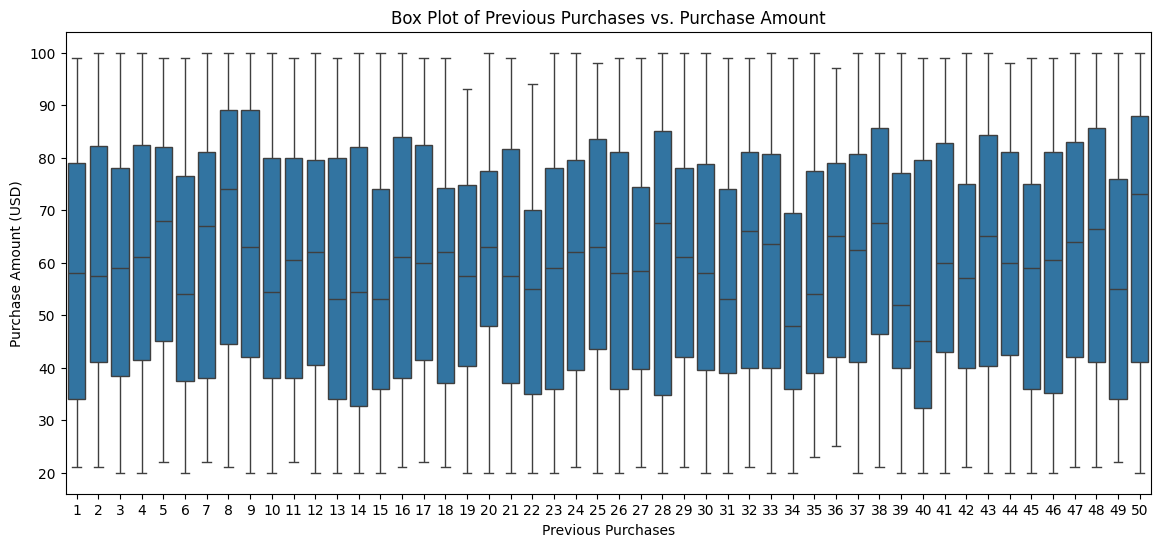

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df, scatter_kws={'s': 5})
plt.title('Scatter Plot with Regression Line of Previous Purchases vs. Purchase Amount')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Correlation coefficient
correlation = df['Previous Purchases'].corr(df['Purchase Amount (USD)'])
print("Correlation coefficient:", correlation)

# Violin Plot
plt.figure(figsize=(14, 6))
sns.violinplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.title('Violin Plot of Previous Purchases vs. Purchase Amount')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.title('Box Plot of Previous Purchases vs. Purchase Amount')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

> ✅ The analysis was based on the assumption that customers with more previous purchases would spend more in their current purchase.
➡ However, no significant correlation was found between previous purchase frequency and current purchase amount.

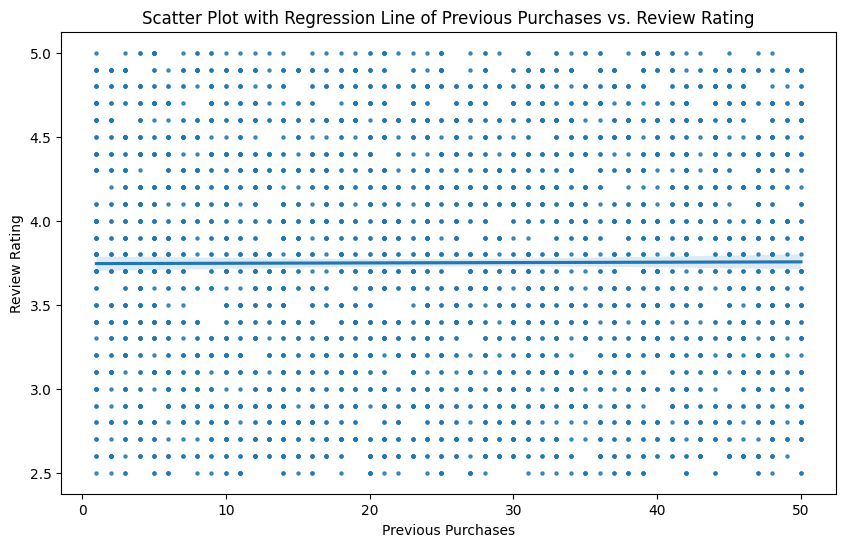

Correlation coefficient: 0.004229099465270922


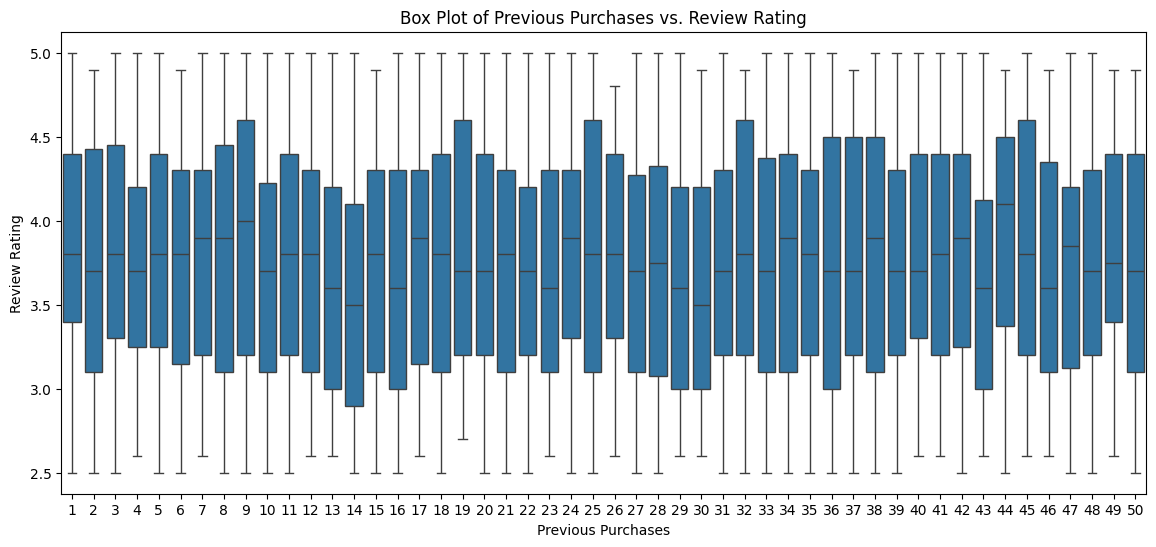

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Previous Purchases', y='Review Rating', data=df, scatter_kws={'s': 5})
plt.title('Scatter Plot with Regression Line of Previous Purchases vs. Review Rating')
plt.xlabel('Previous Purchases')
plt.ylabel('Review Rating')
plt.show()

# Correlation coefficient
correlation = df['Previous Purchases'].corr(df['Review Rating'])
print("Correlation coefficient:", correlation)

# Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Previous Purchases', y='Review Rating', data=df)
plt.title('Box Plot of Previous Purchases vs. Review Rating')
plt.xlabel('Previous Purchases')
plt.ylabel('Review Rating')
plt.show()

✅ The analysis was conducted based on the assumption that customers with more previous purchases would give higher review scores.
➡ However, there was no significant correlation observed between purchase frequency and review score.

---
#### Analysis Based on Subscription State

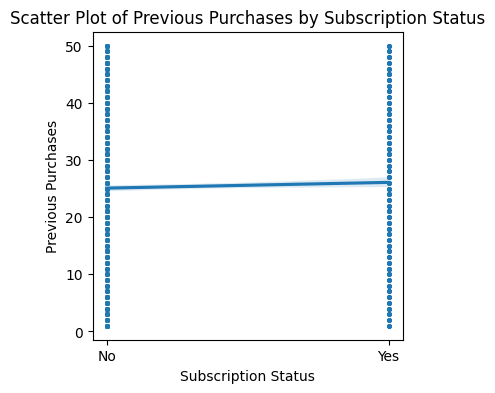

Correlation coefficient: 0.03085943612525038


In [106]:
df['Subscription Numeric'] = df['Subscription Status'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(4, 4))
# sns.scatterplot(x='Subscription Numeric', y='Previous Purchases', data=df, alpha=0.5)
sns.regplot(x='Subscription Numeric', y='Previous Purchases', data=df, scatter_kws={'s': 5})
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Scatter Plot of Previous Purchases by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Previous Purchases')
plt.show()

# Correlation coefficient
correlation = df['Subscription Numeric'].corr(df['Previous Purchases'])
print("Correlation coefficient:", correlation)

> ✅ The analysis was conducted based on the assumption that subscribed customers might have made more purchases. ➡ However, only a very weak positive correlation was observed between subscription status and previous purchases.

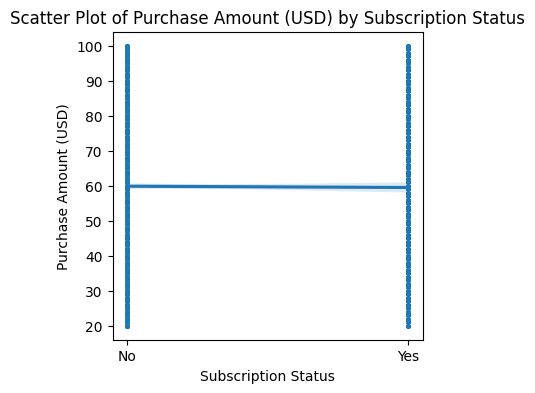

Correlation coefficient: -0.006996040561289919


In [107]:
plt.figure(figsize=(4, 4))
# sns.scatterplot(x='Subscription Numeric', y='Purchase Amount (USD)', data=df, alpha=0.5)
sns.regplot(x='Subscription Numeric', y='Purchase Amount (USD)', data=df, scatter_kws={'s': 5})
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Scatter Plot of Purchase Amount (USD) by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()

correlation = df['Subscription Numeric'].corr(df['Purchase Amount (USD)'])
print("Correlation coefficient:", correlation)

> ✅ The analysis was conducted to examine the relationship between subscription status and current purchase amount. ➡ No meaningful correlation was observed.

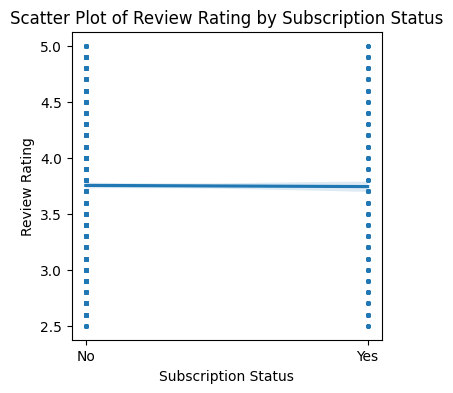

Correlation coefficient: -0.006368054269748981


In [108]:
plt.figure(figsize=(4, 4))
# sns.scatterplot(x='Subscription Numeric', y='Purchase Amount (USD)', data=df, alpha=0.5)
sns.regplot(x='Subscription Numeric', y='Review Rating', data=df, scatter_kws={'s': 5})
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Scatter Plot of Review Rating by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Review Rating')
plt.show()

correlation = df['Subscription Numeric'].corr(df['Review Rating'])
print("Correlation coefficient:", correlation)

> ✅ The analysis was conducted to examine the relationship between subscription status and review score. ➡ No meaningful correlation was observed.

---
#### Analysis Based on Location (State)


Previous Purchase Frequency by Region

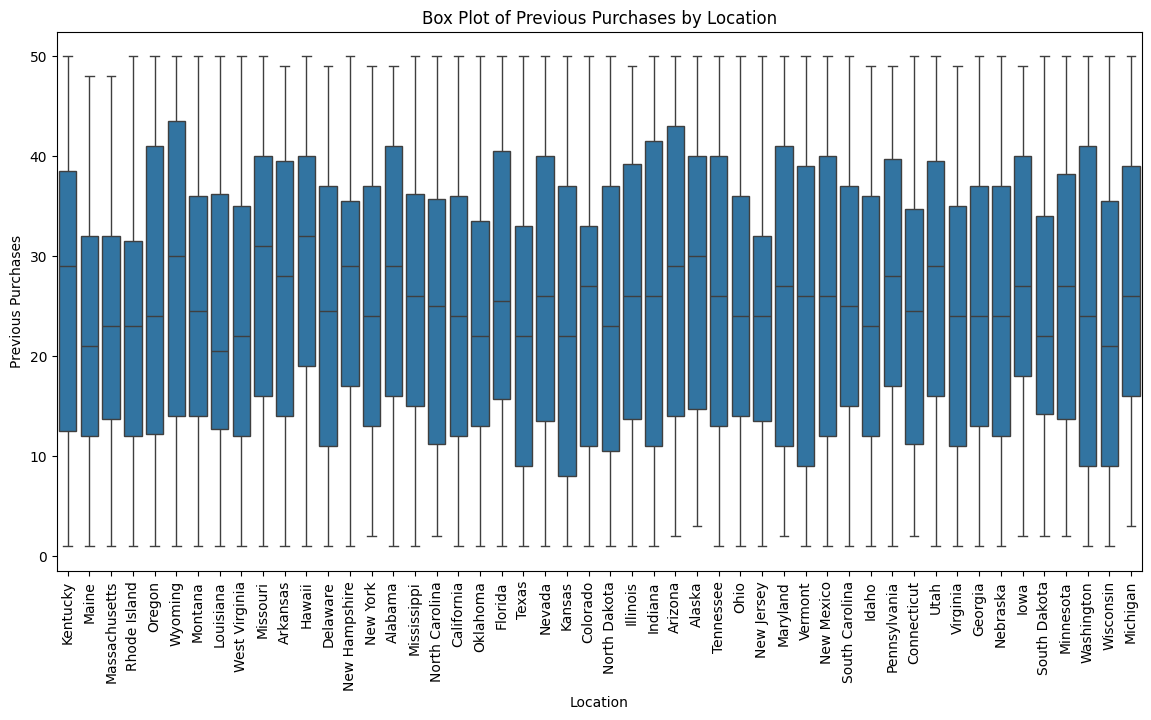

In [109]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Location', y='Previous Purchases', data=df)
plt.title('Box Plot of Previous Purchases by Location')
plt.xlabel('Location')
plt.ylabel('Previous Purchases')
plt.xticks(rotation=90)
plt.show()

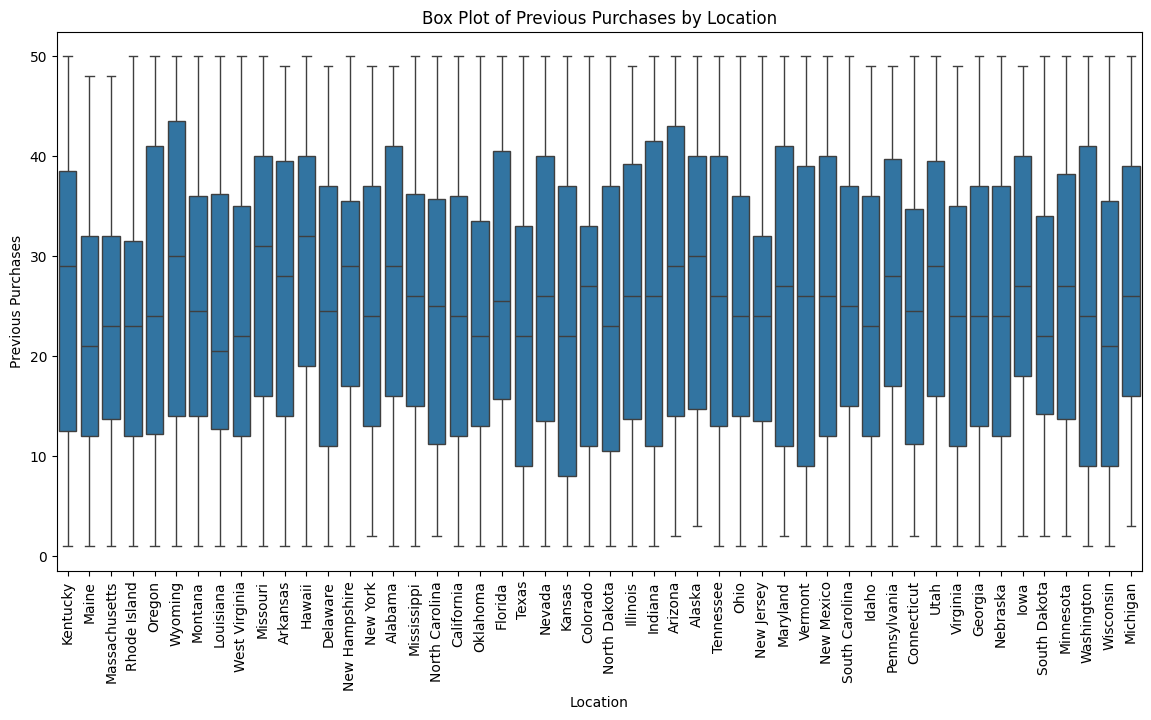

In [110]:
plt.figure(figsize=(14, 7))
boxplot = sns.boxplot(x='Location', y='Previous Purchases', data=df)

# Extract the median, Q1, and Q3 for each box and add them as labels
for i, box in enumerate(boxplot.artists):
    box_x = box.get_x()
    box_width = box.get_width()
    median = df.groupby('Location')['Previous Purchases'].median().iloc[i]
    q1 = df.groupby('Location')['Previous Purchases'].quantile(0.25).iloc[i]
    q3 = df.groupby('Location')['Previous Purchases'].quantile(0.75).iloc[i]

    # Add median label
    plt.text(box_x + box_width/2., median, f'Median: {median}',
             horizontalalignment='center', verticalalignment='center',
             fontdict={'color':'white', 'fontsize':10})

    # Add Q1 and Q3 labels
    plt.text(box_x + box_width/2., q1, f'Q1: {q1}',
             horizontalalignment='center', verticalalignment='center',
             fontdict={'color':'white', 'fontsize':10})
    plt.text(box_x + box_width/2., q3, f'Q3: {q3}',
             horizontalalignment='center', verticalalignment='center',
             fontdict={'color':'white', 'fontsize':10})

plt.title('Box Plot of Previous Purchases by Location')
plt.xlabel('Location')
plt.ylabel('Previous Purchases')
plt.xticks(rotation=90)
plt.show()


In [111]:
mean_previous_purchases_by_location = df.groupby('Location')['Previous Purchases'].mean().to_frame('Average Previous Purchases')
mean_previous_purchases_by_location_sorted = mean_previous_purchases_by_location.sort_values(by='Average Previous Purchases', ascending=False)
mean_previous_purchases_by_location_sorted

Average Previous Purchases
Location                                  
Hawaii                           29.169231
Arizona                          28.369231
Wyoming                          28.239437
Missouri                         28.148148
Alaska                           28.097222
Iowa                             27.608696
Alabama                          27.449438
Pennsylvania                     27.418919
Utah                             27.169014
New Hampshire                    27.098592
Arkansas                         27.063291
Michigan                         26.945205
Illinois                         26.597826
Maryland                         26.534884
Kentucky                         26.417722
Minnesota                        26.215909
Florida                          26.132353
New Mexico                       26.037037
Nevada                           26.034483
Mississippi                      26.012500
South Carolina                   26.000000
Tennessee                        25.961039
Indiana                          25.822785
Oregon                           25.513514
Montana                          25.270833
Ohio                             25.142857
Georgia                          25.075949
North Carolina                   24.769231
Nebraska                         24.758621
Washington                       24.698630
Delaware                         24.627907
South Dakota                     24.600000
Vermont                          24.600000
California                       24.494737
New York                         24.241379
Idaho                            24.204301
Connecticut                      24.000000
Colorado                         23.973333
North Dakota                     23.771084
New Jersey                       23.761194
Rhode Island                     23.571429
West Virginia                    23.555556
Virginia                         23.506494
Louisiana                        23.440476
Kansas                           23.380952
Massachusetts                    23.013889
Oklahoma                         22.973333
Wisconsin                        22.960000
Maine                            22.649351
Texas                            21.480519

Purchase Count by Location and Season

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame that contains 'Location' and 'Season' columns
# Define the order of the seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Create a pivot table with the specified season order
pivot_table = df.pivot_table(index='Location', columns='Season', aggfunc='size', fill_value=0)[season_order]

# Now, plot the heatmap
plt.figure(figsize=(14, 20))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Reds")
plt.title('Heatmap of Season Count by Location')
plt.xlabel('Season')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

In [113]:
pivot_table

Season          Spring  Summer  Fall  Winter
Location                                    
Alabama             24      24    24      17
Alaska              27      12    15      18
Arizona             16      18    18      13
Arkansas            24      20    19      16
California          23      23    27      22
Colorado            22      18    12      23
Connecticut         21      15    20      22
Delaware            22      20    24      20
Florida             13      17    20      18
Georgia             20      18    18      23
Hawaii              14      15    20      16
Idaho               26      26    25      16
Illinois            25      23    22      22
Indiana             23      18    16      22
Iowa                14      18    17      20
Kansas              20      17    14      12
Kentucky            25      12    17      25
Louisiana           24      16    19      25
Maine               22      13    16      26
Maryland            26      24    20      16
Massachusetts       18      22    12      20
Michigan            17      21    22      13
Minnesota           23      19    25      21
Mississippi         15      20    20      25
Missouri            23      19    25      14
Montana             25      26    20      25
Nebraska            24      22    22      19
Nevada              28      27    17      15
New Hampshire       19      12    19      21
New Jersey          23      20    14      10
New Mexico          19      22    21      19
New York            16      21    25      25
North Carolina      27      17    17      17
North Dakota        17      27    21      18
Ohio                10      21    23      23
Oklahoma            16      14    18      27
Oregon              21      16    16      21
Pennsylvania        17      27    15      15
Rhode Island        17      13    10      23
South Carolina      25      15    27       9
South Dakota        15      19    23      13
Tennessee           22      18    20      17
Texas               14      19    26      18
Utah                12      18    24      17
Vermont             14      18    22      31
Virginia            17      22    13      25
Washington          24      21    12      16
West Virginia       22      17    21      21
Wisconsin           10      24    22      19
Wyoming             18      11    20      22

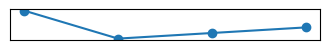

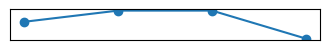

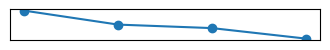

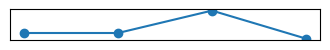

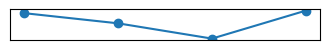

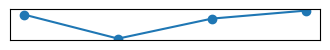

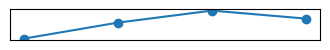

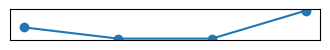

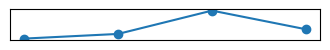

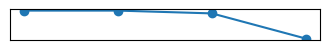

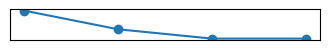

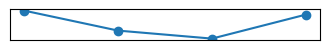

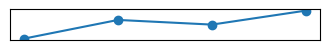

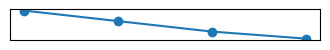

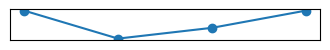

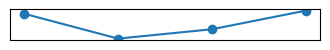

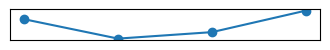

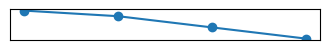

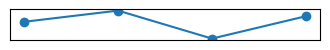

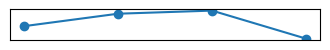

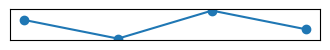

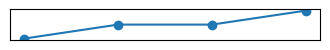

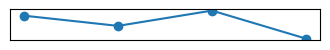

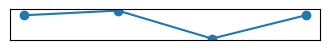

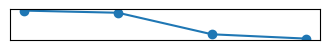

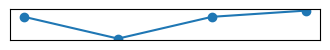

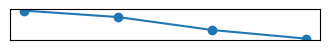

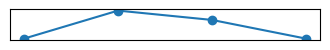

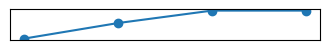

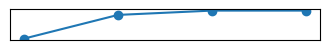

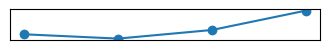

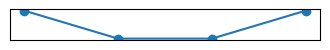

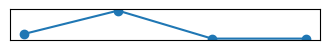

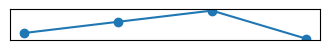

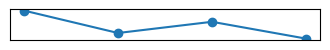

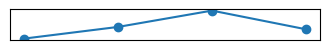

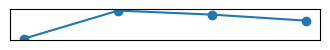

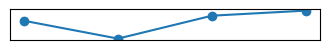

In [114]:
# Let's assume that 'pivot_table' is already defined and contains season counts indexed by states

# Generate individual line charts for each state's seasonal data
for state in pivot_table.index:
    plt.figure(figsize=(4, 20/50))  # Create a new figure for each state
    plt.plot(pivot_table.columns, pivot_table.loc[state, :], marker='o')  # Plot the line chart for the state
    # plt.title(f'Seasonal Data for {state}')
    # plt.xlabel('Season')
    # plt.ylabel('Count')
    plt.grid(False)
    # plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    # plt.tight_layout()  # Adjust layout to fit elements

    plt.show()  # Display the plot

# Note: The actual column names for seasons and the index name for states should match the 'pivot_table' DataFrame.


<Figure size 640x480 with 0 Axes>

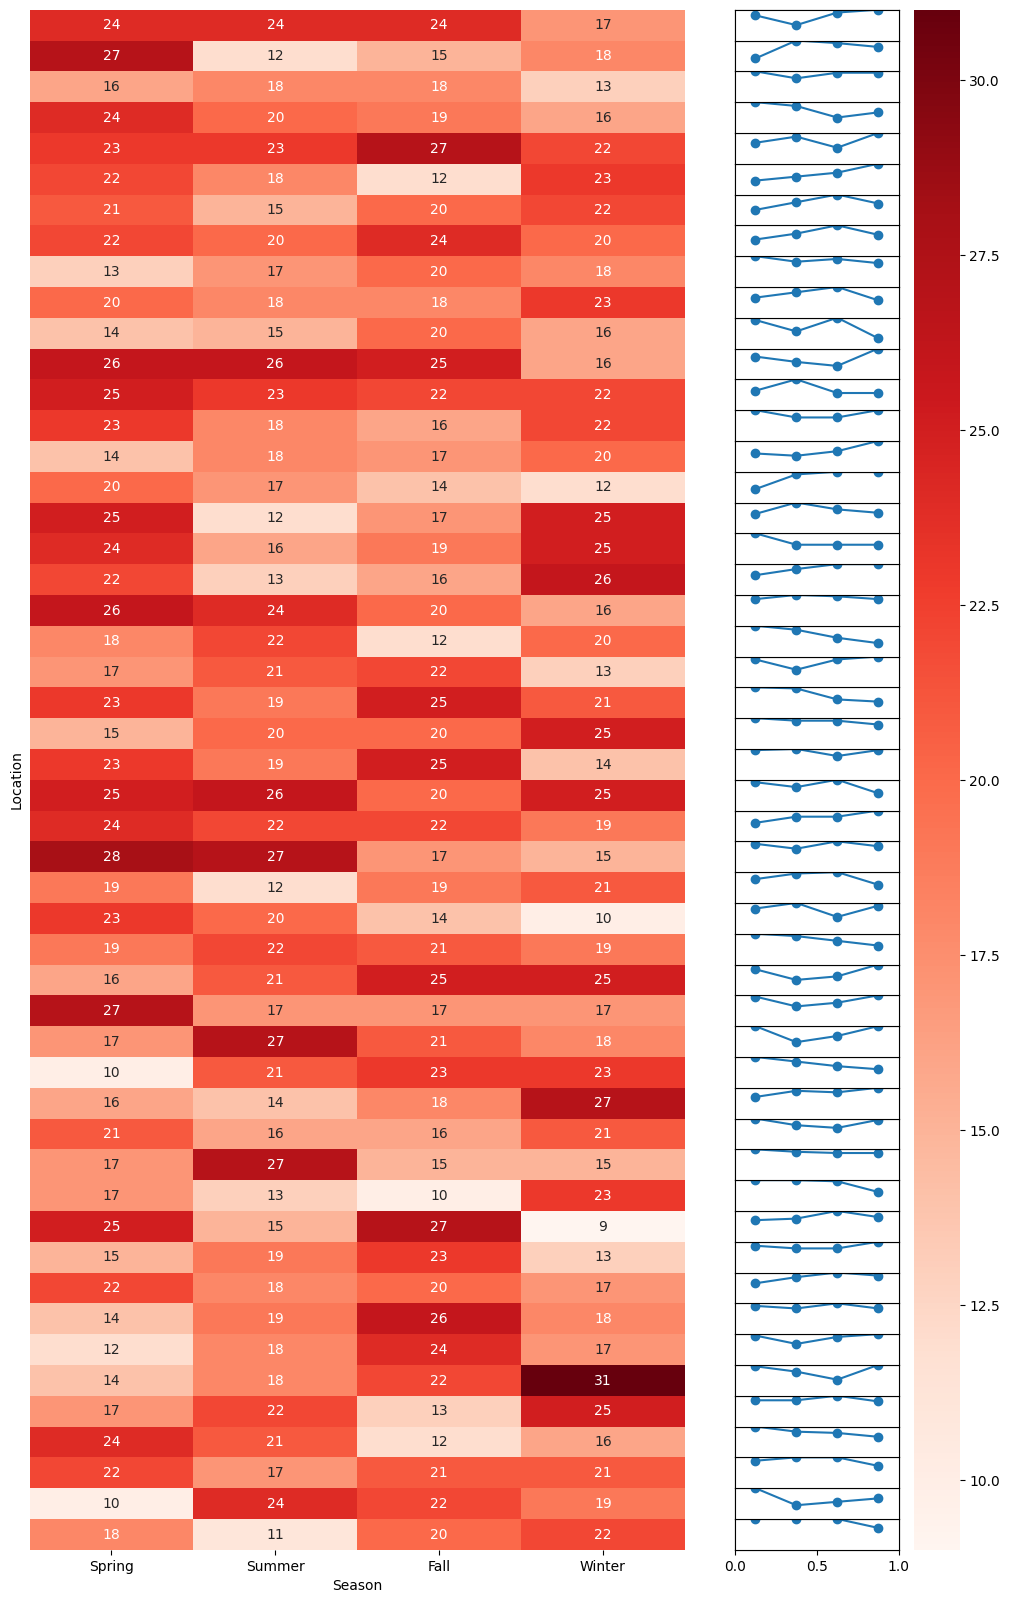

In [115]:
#### Location is not displayed

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns
import pandas as pd

# Assuming 'pivot_table' is the DataFrame used to create the heatmap,
# and it contains season counts indexed by states.

plt.subplots_adjust(left=0.3)

# Calculate the figure size needed based on the number of rows (states) in the heatmap
# and the aspect ratio for each subplot of the line charts.
# heatmap_height = len(pivot_table.index) * 0.25  # Example height of 0.25 per row
heatmap_height = 20  # Example height of 0.25 per row
# heatmap_aspect_ratio = 10  # Width is 10 times the height
heatmap_aspect_ratio = 0.1  # Width is 10 times the height
line_chart_aspect_ratio = 0.5  # Width of line chart is 0.5 times its height

# Calculate total figure width to accommodate both the heatmap and line charts
fig_width = heatmap_height * (heatmap_aspect_ratio + line_chart_aspect_ratio)

# Create the figure with two subplots: one for the heatmap and one for the line charts
fig = plt.figure(figsize=(fig_width, heatmap_height))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.5,
                share_all=False,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="7%",
                cbar_pad=0.15,
                aspect=False)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Reds", ax=grid[0], cbar_ax=grid.cbar_axes[0], annot_kws={"size": 10})

# Remove y-ticks for the line chart axes
grid[1].set_yticks([])

# Plot the line charts
for i, (idx, row) in enumerate(pivot_table.iterrows()):
    # Create an axis for each line chart
    ax = grid[1].inset_axes([0, i/len(pivot_table.index), 1, 1/len(pivot_table.index)])

    # Plot the line chart on the inset axis
    ax.plot(row.index, row.values, marker='o')
    ax.set_xlim(-0.5, len(pivot_table.columns) - 0.5)
    ax.set_ylim(0, row.values.max())

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust the layout and display the figure
# plt.tight_layout()

plt.show()


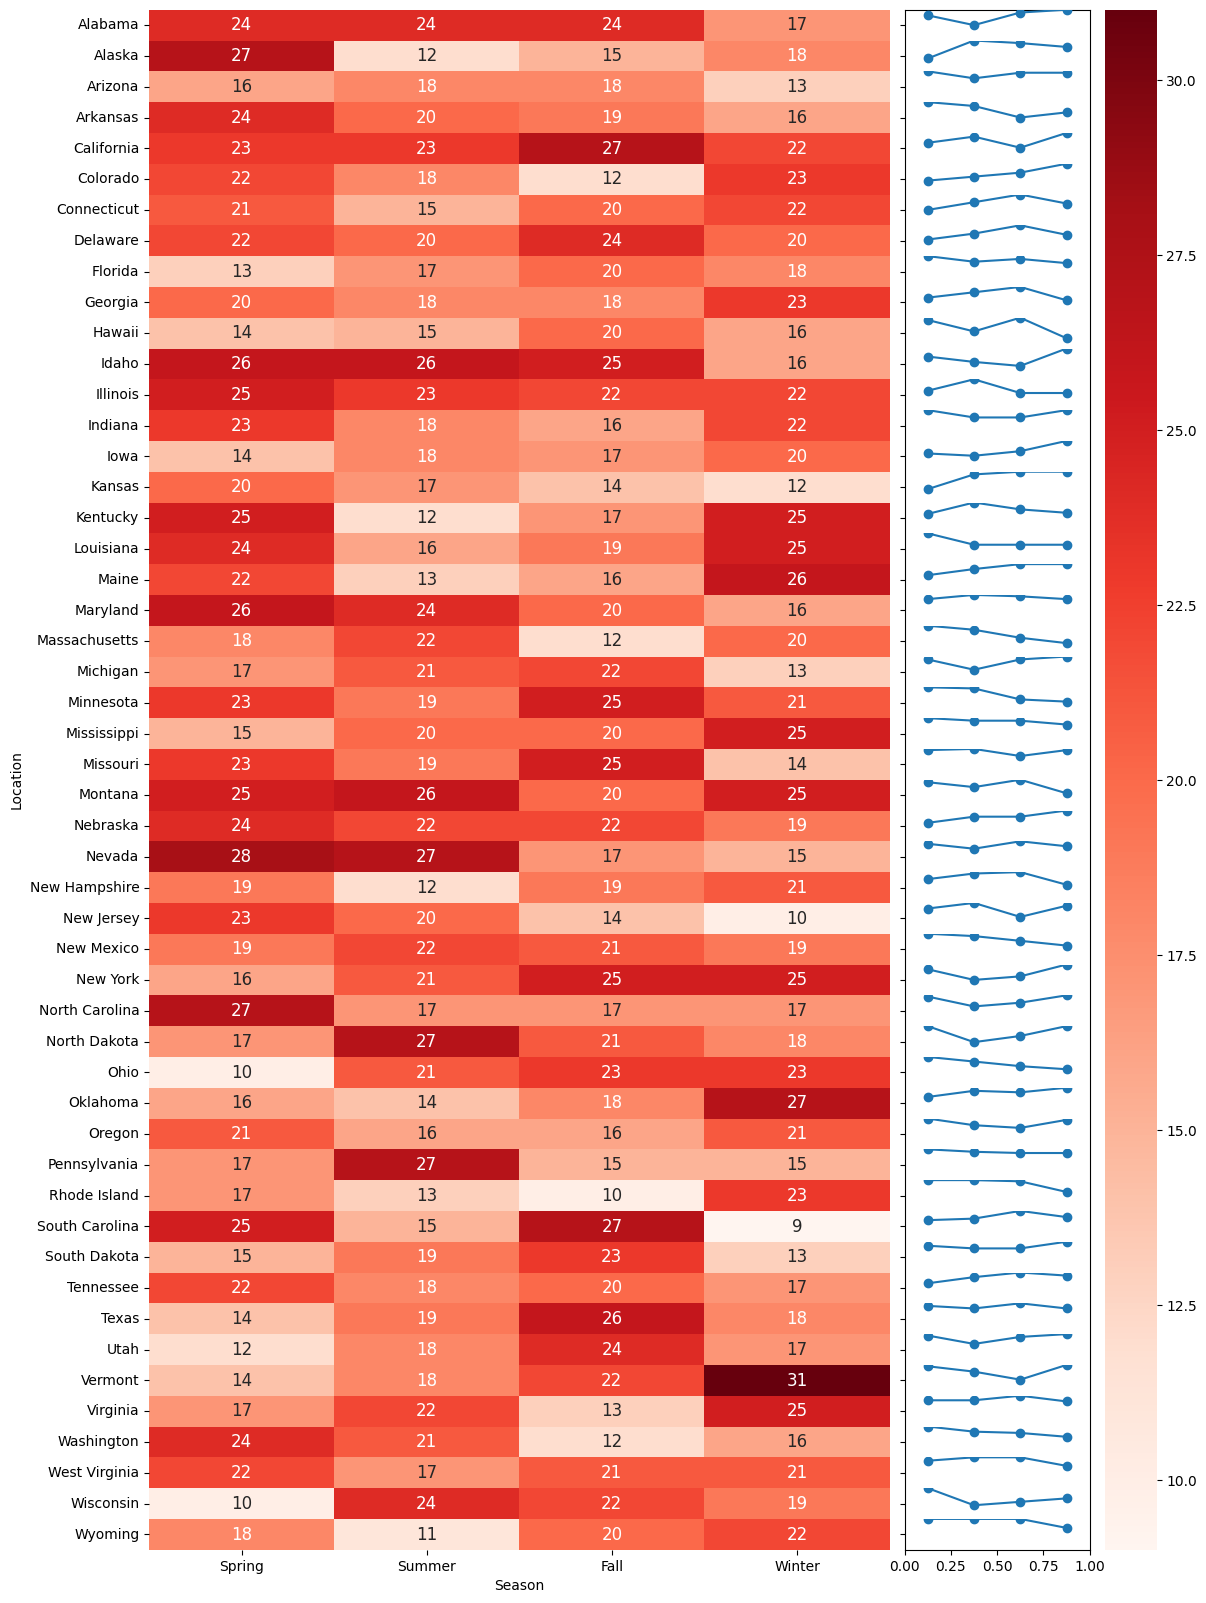

In [116]:
#### Location order in the heatmap is the opposite of that in the line chart.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'pivot_table' is already created and contains season counts indexed by states

# Set the figure size here
heatmap_width = 10  # Width for the heatmap
line_chart_width = 3  # Width for the line charts
fig_width = heatmap_width + line_chart_width
heatmap_height = 20  # Adjust this as needed based on the number of rows/states

# Create the figure with an updated size that should accommodate the location labels
fig = plt.figure(figsize=(fig_width, heatmap_height))

# Create a subplot for the heatmap with appropriate width ratio
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.15,
                share_all=False,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="7%",
                cbar_pad=0.15,
                aspect=False)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Reds", ax=grid[0],
            cbar_ax=grid.cbar_axes[0], annot_kws={"size": 12})  # You can adjust the size as necessary

# Adjust tick parameters to ensure the state names are visible and not too cramped
grid[0].tick_params(labelsize=10, rotation=0)  # Adjust the label size as needed

# Plot the line charts
for i, (idx, row) in enumerate(pivot_table.iterrows()):
    # Set the axis for the line chart
    ax = grid[1].inset_axes([0, i/len(pivot_table.index), 1, 1/len(pivot_table.index)])

    # Plot the line chart on the inset axis
    ax.plot(row.index, row.values, marker='o')
    ax.set_xlim(-0.5, len(pivot_table.columns) - 0.5)
    ax.set_ylim(0, row.values.max())

    # Remove axis labels and ticks
    ax.axis('off')

plt.show()


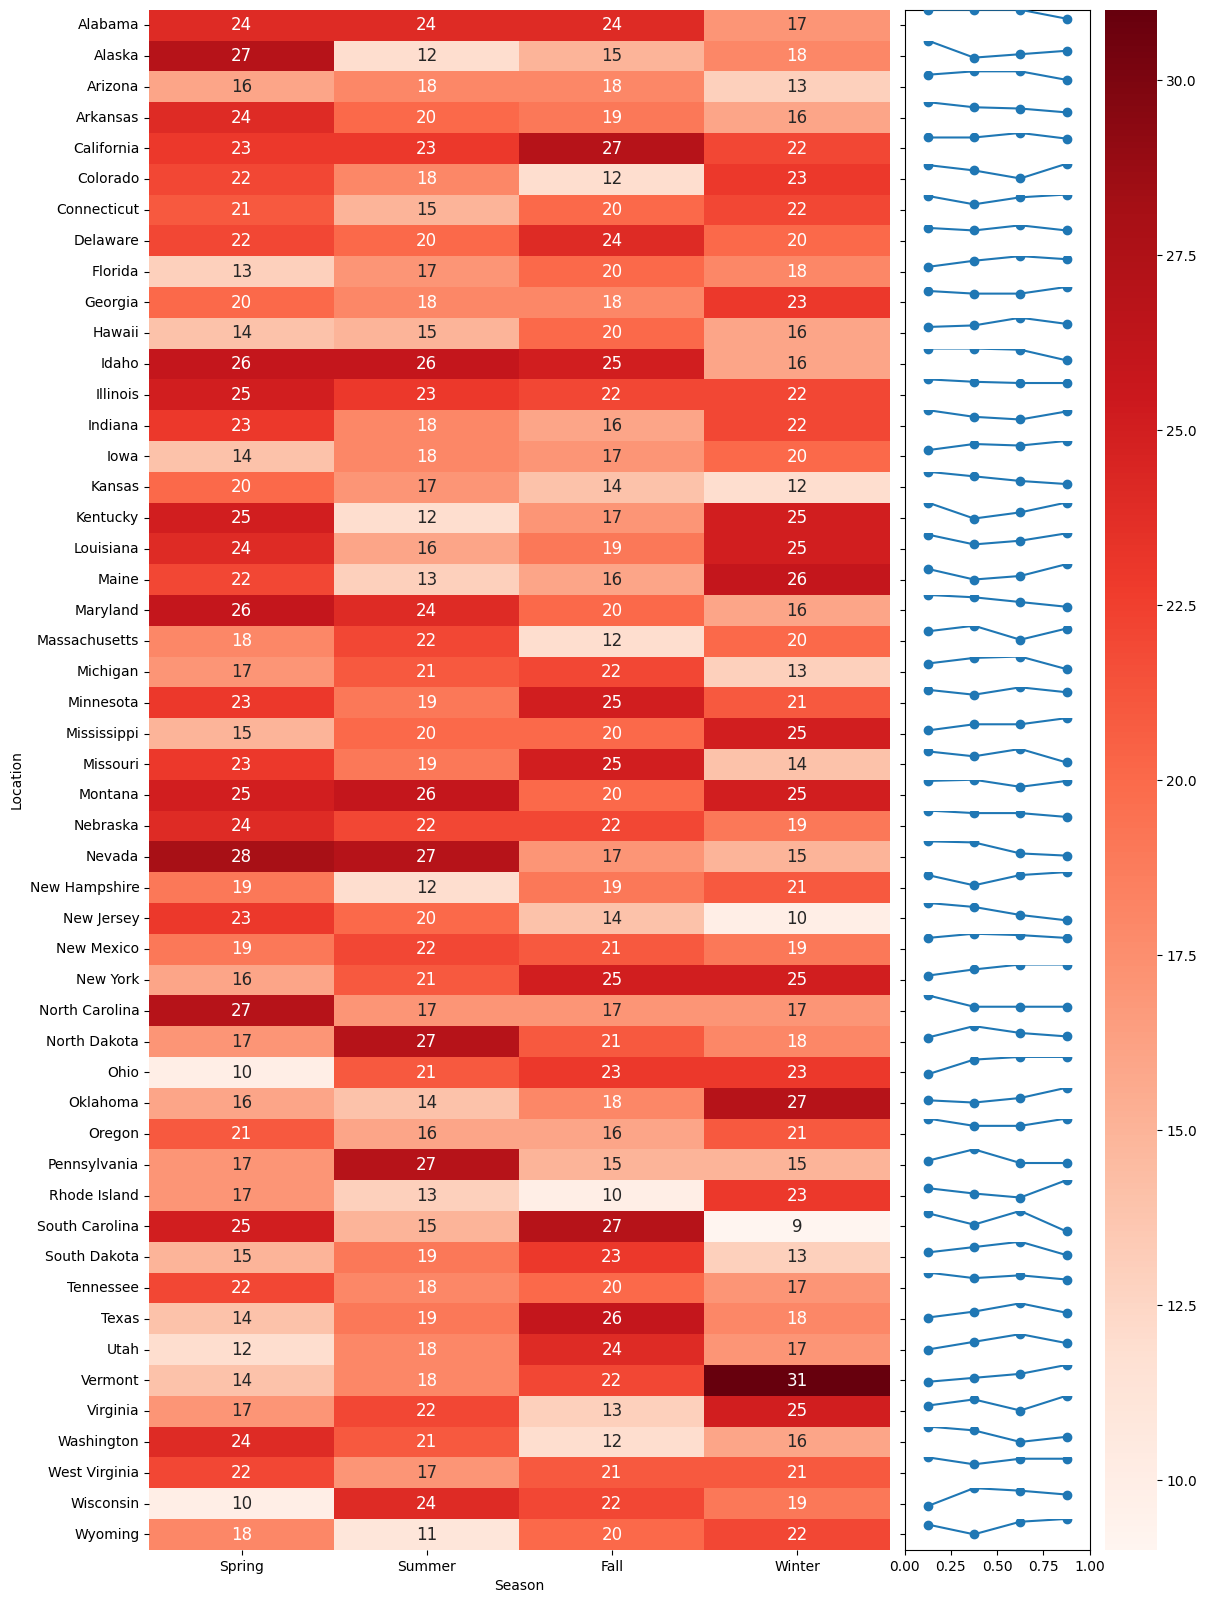

In [117]:
#### Final Version

# Assuming 'pivot_table' is already created and contains season counts indexed by states

# Set the figure size here
heatmap_width = 10  # Width for the heatmap
line_chart_width = 3  # Width for the line charts
fig_width = heatmap_width + line_chart_width
heatmap_height = 20  # Adjust this as needed based on the number of rows/states

# Create the figure with an updated size that should accommodate the location labels
fig = plt.figure(figsize=(fig_width, heatmap_height))

# Create a subplot for the heatmap with appropriate width ratio
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.15,
                share_all=False,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="7%",
                cbar_pad=0.15,
                aspect=False)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Reds", ax=grid[0],
            cbar_ax=grid.cbar_axes[0], annot_kws={"size": 12})

# Adjust tick parameters to ensure the state names are visible and not too cramped
grid[0].tick_params(labelsize=10, rotation=0)  # Adjust the label size as needed

# Plot the line charts, ensuring they are inverted to match the heatmap's order
for i, (idx, row) in enumerate(pivot_table.iterrows()):
    # Inverting the index to match the heatmap order
    inverted_i = len(pivot_table.index) - i - 1

    # Set the axis for the line chart, using the inverted index
    ax = grid[1].inset_axes([0, inverted_i/len(pivot_table.index), 1, 1/len(pivot_table.index)])

    # Plot the line chart on the inset axis
    ax.plot(row.index, row.values, marker='o')
    ax.set_xlim(-0.5, len(pivot_table.columns) - 0.5)
    ax.set_ylim(0, row.values.max())

    # Remove axis labels and ticks
    ax.axis('off')

plt.show()


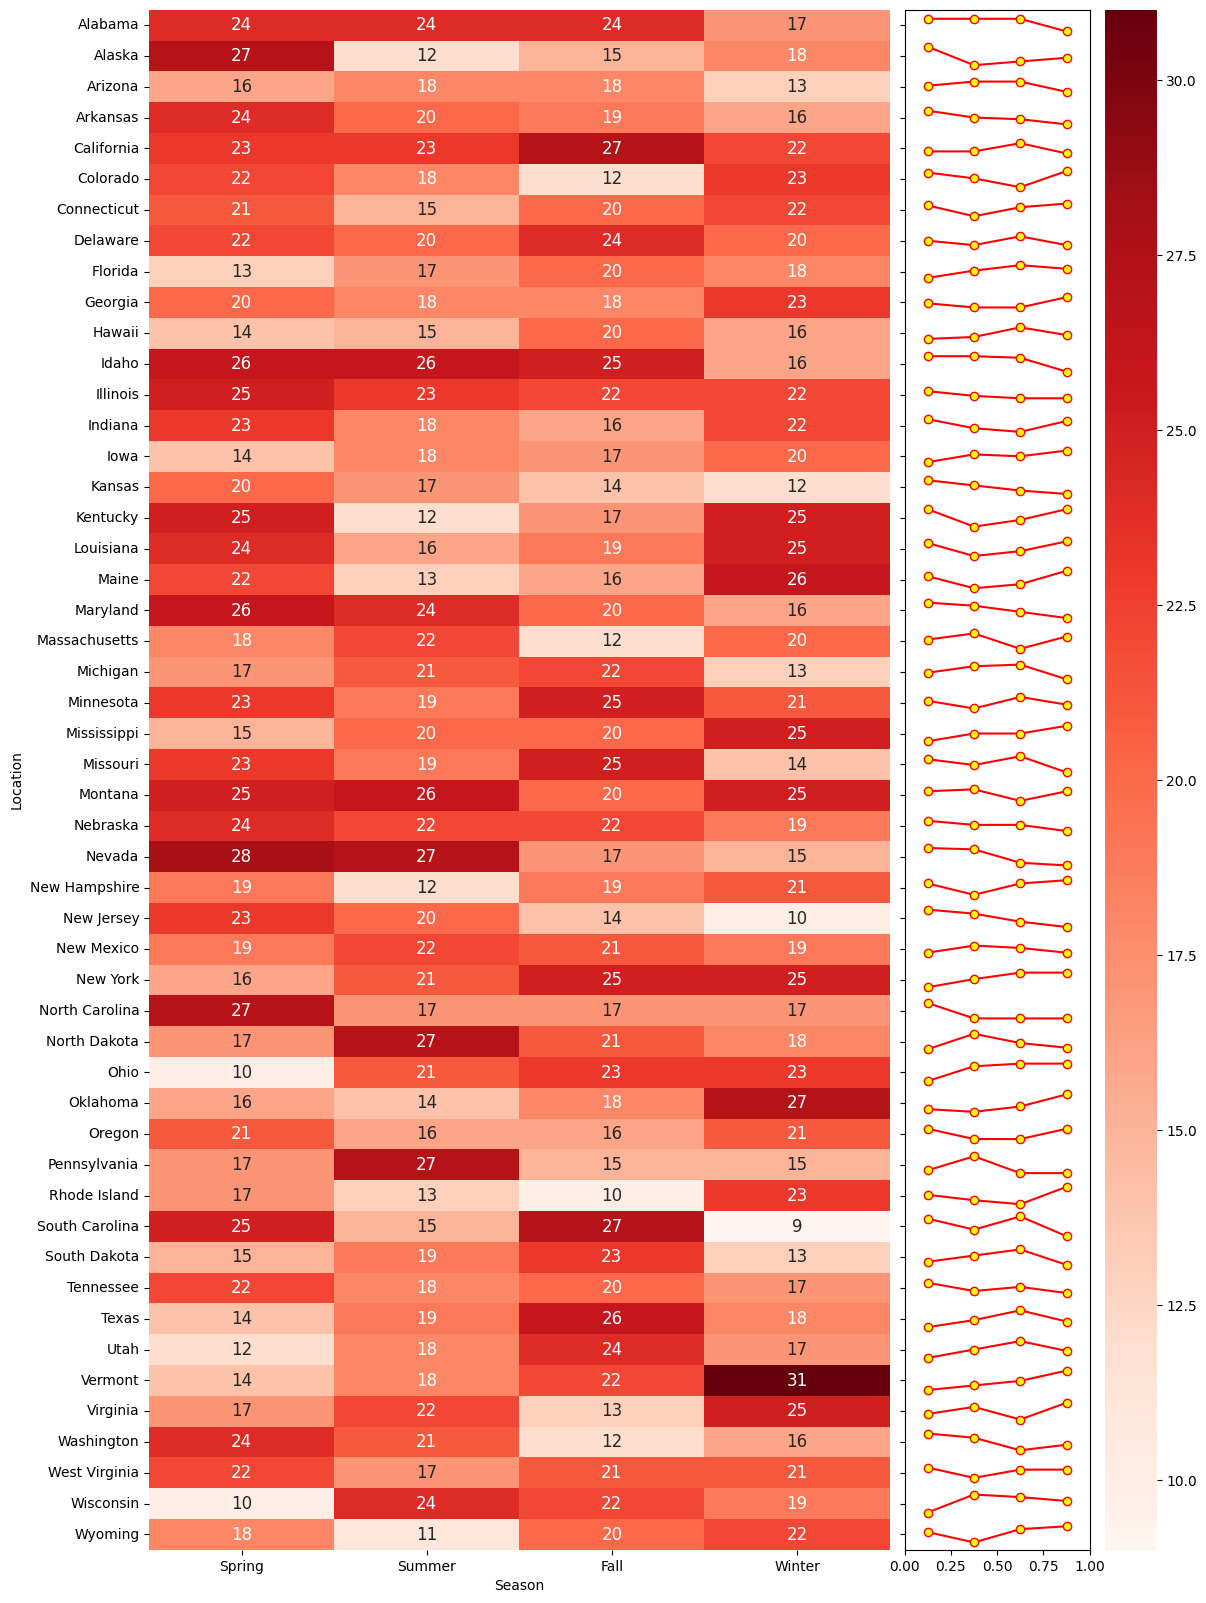

In [163]:
#### Final_Color Change

# Assuming 'pivot_table' is already created and contains season counts indexed by states

# Set the figure size here
heatmap_width = 10  # Width for the heatmap
line_chart_width = 3  # Width for the line charts
fig_width = heatmap_width + line_chart_width
heatmap_height = 20  # Adjust this as needed based on the number of rows/states

# Create the figure with an updated size that should accommodate the location labels
fig = plt.figure(figsize=(fig_width, heatmap_height))

# Create a subplot for the heatmap with appropriate width ratio
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.15,
                share_all=False,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="7%",
                cbar_pad=0.15,
                aspect=False)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Reds", ax=grid[0],
            cbar_ax=grid.cbar_axes[0], annot_kws={"size": 12})

# Adjust tick parameters to ensure the state names are visible and not too cramped
grid[0].tick_params(labelsize=10, rotation=0)  # Adjust the label size as needed

# Plot the line charts, ensuring they are inverted to match the heatmap's order
for i, (idx, row) in enumerate(pivot_table.iterrows()):
    # Inverting the index to match the heatmap order
    inverted_i = len(pivot_table.index) - i - 1

    # Set the axis for the line chart, using the inverted index
    ax = grid[1].inset_axes([0, inverted_i/len(pivot_table.index), 1, 1/len(pivot_table.index)])

    # Plot the line chart with red line and red/yellow markers
    ax.plot(
        row.index,
        row.values,
        color='red',
        marker='o',
        markerfacecolor='yellow',
        markeredgecolor='red',
        linewidth=1.5,
        markersize=6
    )

    ax.set_xlim(-0.5, len(pivot_table.columns) - 0.5)
    # ax.set_ylim(0, row.values.max())
    ax.set_ylim(row.values.min()-5, row.values.max()+5)

    # Remove axis labels and ticks
    ax.axis('off')

plt.show()


#### Correlation Analysis Between Purchase Count and Climate Indicators

In [119]:
pivot_table

Season          Spring  Summer  Fall  Winter
Location                                    
Alabama             24      24    24      17
Alaska              27      12    15      18
Arizona             16      18    18      13
Arkansas            24      20    19      16
California          23      23    27      22
Colorado            22      18    12      23
Connecticut         21      15    20      22
Delaware            22      20    24      20
Florida             13      17    20      18
Georgia             20      18    18      23
Hawaii              14      15    20      16
Idaho               26      26    25      16
Illinois            25      23    22      22
Indiana             23      18    16      22
Iowa                14      18    17      20
Kansas              20      17    14      12
Kentucky            25      12    17      25
Louisiana           24      16    19      25
Maine               22      13    16      26
Maryland            26      24    20      16
Massachusetts       18      22    12      20
Michigan            17      21    22      13
Minnesota           23      19    25      21
Mississippi         15      20    20      25
Missouri            23      19    25      14
Montana             25      26    20      25
Nebraska            24      22    22      19
Nevada              28      27    17      15
New Hampshire       19      12    19      21
New Jersey          23      20    14      10
New Mexico          19      22    21      19
New York            16      21    25      25
North Carolina      27      17    17      17
North Dakota        17      27    21      18
Ohio                10      21    23      23
Oklahoma            16      14    18      27
Oregon              21      16    16      21
Pennsylvania        17      27    15      15
Rhode Island        17      13    10      23
South Carolina      25      15    27       9
South Dakota        15      19    23      13
Tennessee           22      18    20      17
Texas               14      19    26      18
Utah                12      18    24      17
Vermont             14      18    22      31
Virginia            17      22    13      25
Washington          24      21    12      16
West Virginia       22      17    21      21
Wisconsin           10      24    22      19
Wyoming             18      11    20      22

In [120]:
file_path = '/content/drive/MyDrive/zerobase/TeamPJ/PurchaseCount.csv'
pivot_table.to_csv(file_path, index=True)

In [121]:
ustemp = pd.read_csv('us_states_montly_temperature.csv')
ustemp.head()

Month  Season       State  High   Low  Precipitation  TempRange  \
0      1  Winter     Alabama  13.4   1.4           13.4       12.0   
1      1  Winter      Alaska -11.8 -19.1            7.2        7.3   
2      1  Winter     Arizona  13.2  -0.8            3.0       14.0   
3      1  Winter    Arkansas  10.0  -0.9            9.7       10.9   
4      1  Winter  California  12.6   1.7           10.5       10.9   

   HighLowMean  
0         7.40  
1       -15.45  
2         6.20  
3         4.55  
4         7.15

In [122]:
ustemp.columns

Index(['Month', 'Season', 'State', 'High', 'Low', 'Precipitation', 'TempRange',
       'HighLowMean'],
      dtype='object')

In [123]:
ordered_seasons = ['Spring', 'Summer', 'Fall', 'Winter']
high_mean = ustemp.pivot_table(index='State',
                             columns='Season',
                             values='High',
                             aggfunc='mean')[ordered_seasons]
high_mean

Season             Spring     Summer       Fall     Winter
State                                                     
Alabama         24.233333  32.066667  24.600000  14.666667
Alaska           1.700000  15.566667   0.866667 -10.333333
Arizona         23.433333  34.333333  24.833333  13.700000
Arkansas        22.166667  32.066667  22.933333  11.300000
California      20.266667  31.433333  23.266667  12.900000
Colorado        14.700000  27.166667  16.100000   4.300000
Connecticut     14.600000  26.966667  16.933333   3.633333
Delaware        18.066667  29.500000  20.166667   7.933333
Florida         27.900000  32.800000  28.366667  21.800000
Georgia         24.633333  32.100000  24.700000  15.466667
Hawaii          26.000000  28.400000  27.933333  25.166667
Idaho           12.200000  25.700000  13.500000   1.300000
Illinois        17.266667  29.100000  18.500000   3.300000
Indiana         17.033333  28.566667  18.400000   3.666667
Iowa            15.100000  27.800000  16.300000  -0.300000
Kansas          19.500000  31.800000  20.566667   7.066667
Kentucky        19.800000  29.900000  20.666667   7.933333
Louisiana       25.366667  32.966667  26.166667  16.700000
Maine           10.000000  23.933333  12.700000  -2.366667
Maryland        18.066667  29.333333  19.666667   7.233333
Massachusetts   13.766667  26.400000  16.366667   2.966667
Michigan        12.133333  25.766667  14.200000  -0.933333
Minnesota       11.400000  25.566667  12.333333  -5.066667
Mississippi     24.333333  32.500000  24.900000  14.600000
Missouri        19.033333  30.266667  19.900000   6.266667
Montana         11.900000  25.600000  12.833333   0.033333
Nebraska        16.233333  29.300000  17.600000   3.466667
Nevada          16.600000  30.266667  18.833333   6.866667
New Hampshire   11.833333  25.000000  14.000000  -0.300000
New Jersey      16.666667  28.600000  18.833333   6.000000
New Mexico      20.933333  30.900000  21.066667  10.533333
New York        12.500000  25.400000  14.800000   0.466667
North Carolina  21.433333  30.233333  22.000000  11.900000
North Dakota    11.266667  26.300000  12.433333  -5.033333
Ohio            16.433333  28.033333  17.900000   3.666667
Oklahoma        22.166667  33.200000  23.066667  11.066667
Oregon          13.733333  25.866667  15.900000   5.366667
Pennsylvania    15.133333  26.866667  16.600000   2.933333
Rhode Island    14.166667  26.433333  17.200000   4.466667
South Carolina  23.966667  32.100000  24.100000  14.666667
South Dakota    13.700000  28.166667  15.366667  -0.466667
Tennessee       21.033333  30.433333  21.733333   9.966667
Texas           25.866667  34.366667  25.966667  16.266667
Utah            15.866667  29.433333  17.133333   4.366667
Vermont         11.100000  24.433333  13.400000  -1.333333
Virginia        19.366667  29.166667  20.200000   8.800000
Washington      13.466667  24.300000  13.966667   3.666667
West Virginia   17.733333  27.700000  18.533333   6.033333
Wisconsin       12.233333  25.766667  13.533333  -2.666667
Wyoming         11.700000  25.866667  13.266667   0.633333

In [124]:
low_mean = ustemp.pivot_table(index='State',
                             columns='Season',
                             values='Low',
                             aggfunc='mean')[ordered_seasons]
low_mean.head()

Season         Spring     Summer       Fall     Winter
State                                                 
Alabama     10.600000  20.333333  11.366667   2.500000
Alaska      -8.100000   6.400000  -6.100000 -17.866667
Arizona      6.633333  17.866667   8.866667  -0.433333
Arkansas     9.766667  20.266667  10.266667   0.200000
California   6.466667  15.133333   8.733333   1.766667

In [125]:
temprange_mean = ustemp.pivot_table(index='State',
                             columns='Season',
                             values='TempRange',
                             aggfunc='mean')[ordered_seasons]
temprange_mean.head()

Season         Spring     Summer       Fall     Winter
State                                                 
Alabama     13.633333  11.733333  13.233333  12.166667
Alaska       9.800000   9.166667   6.966667   7.533333
Arizona     16.800000  16.466667  15.966667  14.133333
Arkansas    12.400000  11.800000  12.666667  11.100000
California  13.800000  16.300000  14.533333  11.133333

In [126]:
mean_mean = ustemp.pivot_table(index='State',
                             columns='Season',
                             values='HighLowMean',
                             aggfunc='mean')[ordered_seasons]
mean_mean.head()

Season         Spring     Summer       Fall     Winter
State                                                 
Alabama     17.416667  26.200000  17.983333   8.583333
Alaska      -3.200000  10.983333  -2.616667 -14.100000
Arizona     15.033333  26.100000  16.850000   6.633333
Arkansas    15.966667  26.166667  16.600000   5.750000
California  13.366667  23.283333  16.000000   7.333333

In [127]:
file_path = '/content/drive/MyDrive/zerobase/TeamPJ/MeanTemp.csv'
mean_mean.to_csv(file_path, index=True)

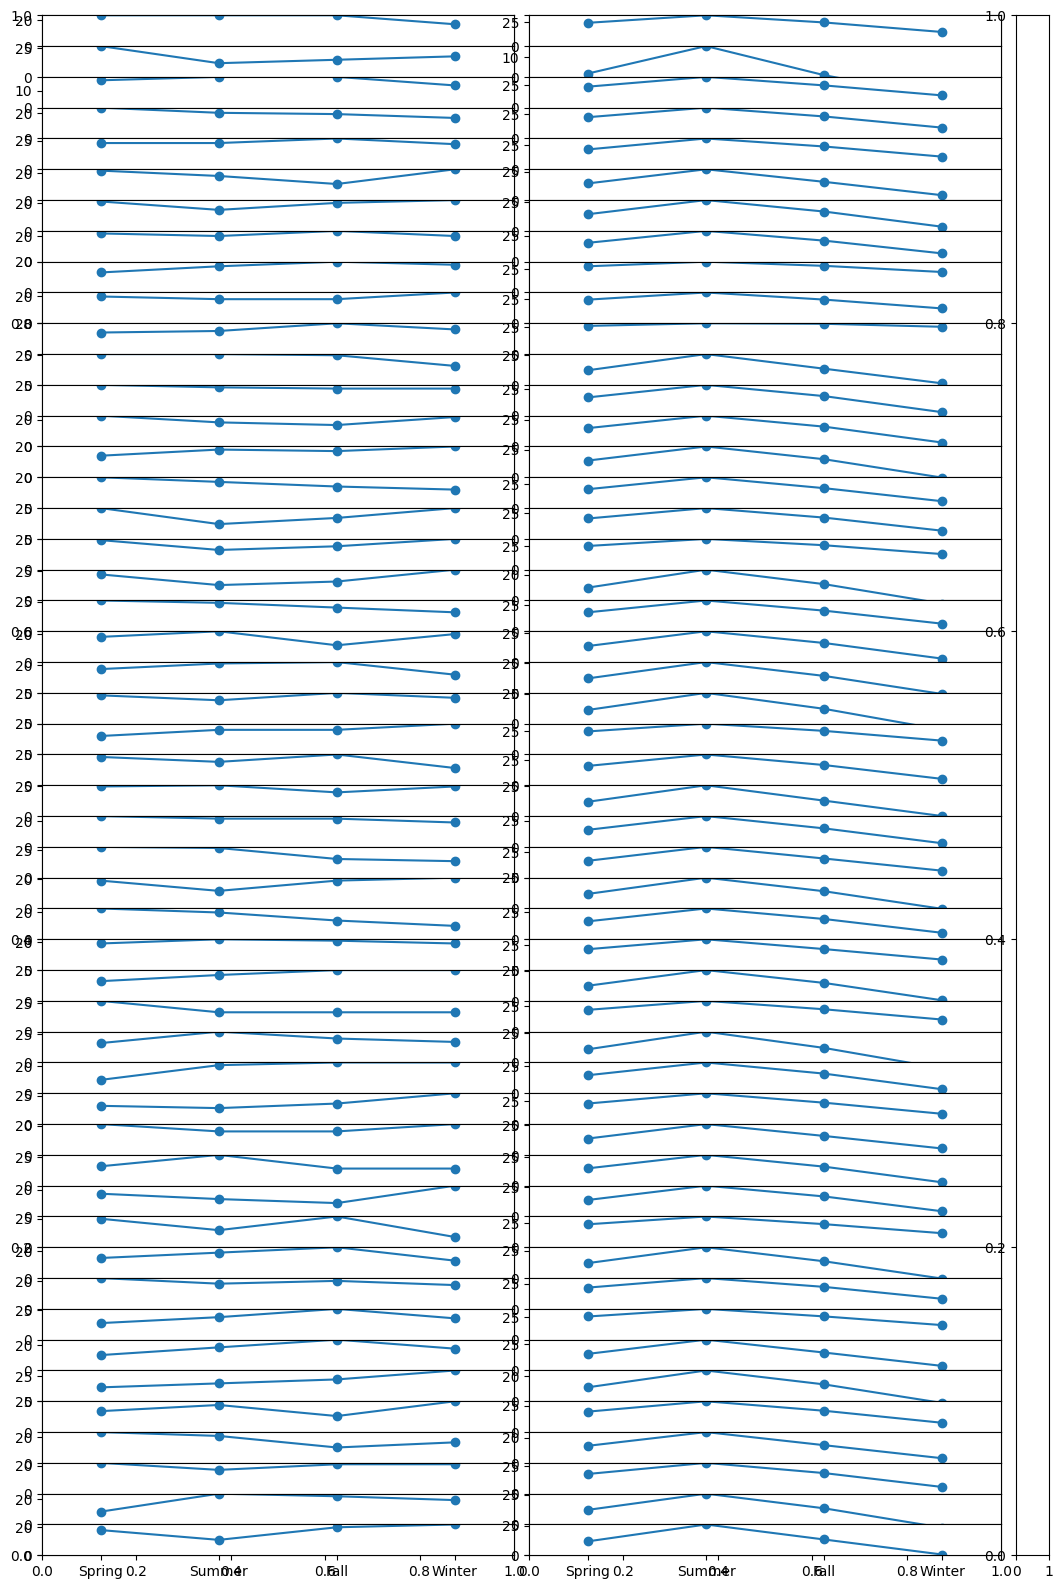

In [128]:
# Set the figure size here
heatmap_width = 10  # Width for the heatmap
line_chart_width = 3  # Width for the line charts
fig_width = heatmap_width + line_chart_width
heatmap_height = 20  # Adjust this as needed based on the number of rows/states

# Create the figure with an updated size that should accommodate the location labels
fig = plt.figure(figsize=(fig_width, heatmap_height))

# Create a subplot for the heatmap with appropriate width ratio
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.15,
                share_all=False,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="7%",
                cbar_pad=0.15,
                aspect=False)

# Plot the heatmap
# sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Reds", ax=grid[0],
            # cbar_ax=grid.cbar_axes[0], annot_kws={"size": 12})

# Adjust tick parameters to ensure the state names are visible and not too cramped
# grid[0].tick_params(labelsize=10, rotation=0)  # Adjust the label size as needed

# Plot the line charts, ensuring they are inverted to match the heatmap's order
for i, (idx, row) in enumerate(pivot_table.iterrows()):
    # Inverting the index to match the heatmap order
    inverted_i = len(pivot_table.index) - i - 1

    # Set the axis for the line chart, using the inverted index
    ax = grid[0].inset_axes([0, inverted_i/len(pivot_table.index), 1, 1/len(pivot_table.index)])

    # Plot the line chart on the inset axis
    ax.plot(row.index, row.values, marker='o')
    ax.set_xlim(-0.5, len(pivot_table.columns) - 0.5)
    ax.set_ylim(0, row.values.max())

    # Remove axis labels and ticks
    # ax.axis('off')


for i, (idx, row) in enumerate(high_mean.iterrows()):
    # Inverting the index to match the heatmap order
    inverted_i = len(high_mean.index) - i - 1

    # Set the axis for the line chart, using the inverted index
    ax2 = grid[1].inset_axes([0, inverted_i/len(high_mean.index), 1, 1/len(high_mean.index)])

    # Plot the line chart on the inset axis
    ax2.plot(row.index, row.values, marker='o')
    ax2.set_xlim(-0.5, len(high_mean.columns) - 0.5)
    ax2.set_ylim(0, row.values.max())

    # Remove axis labels and ticks
    # ax2.axis('off')

plt.show()


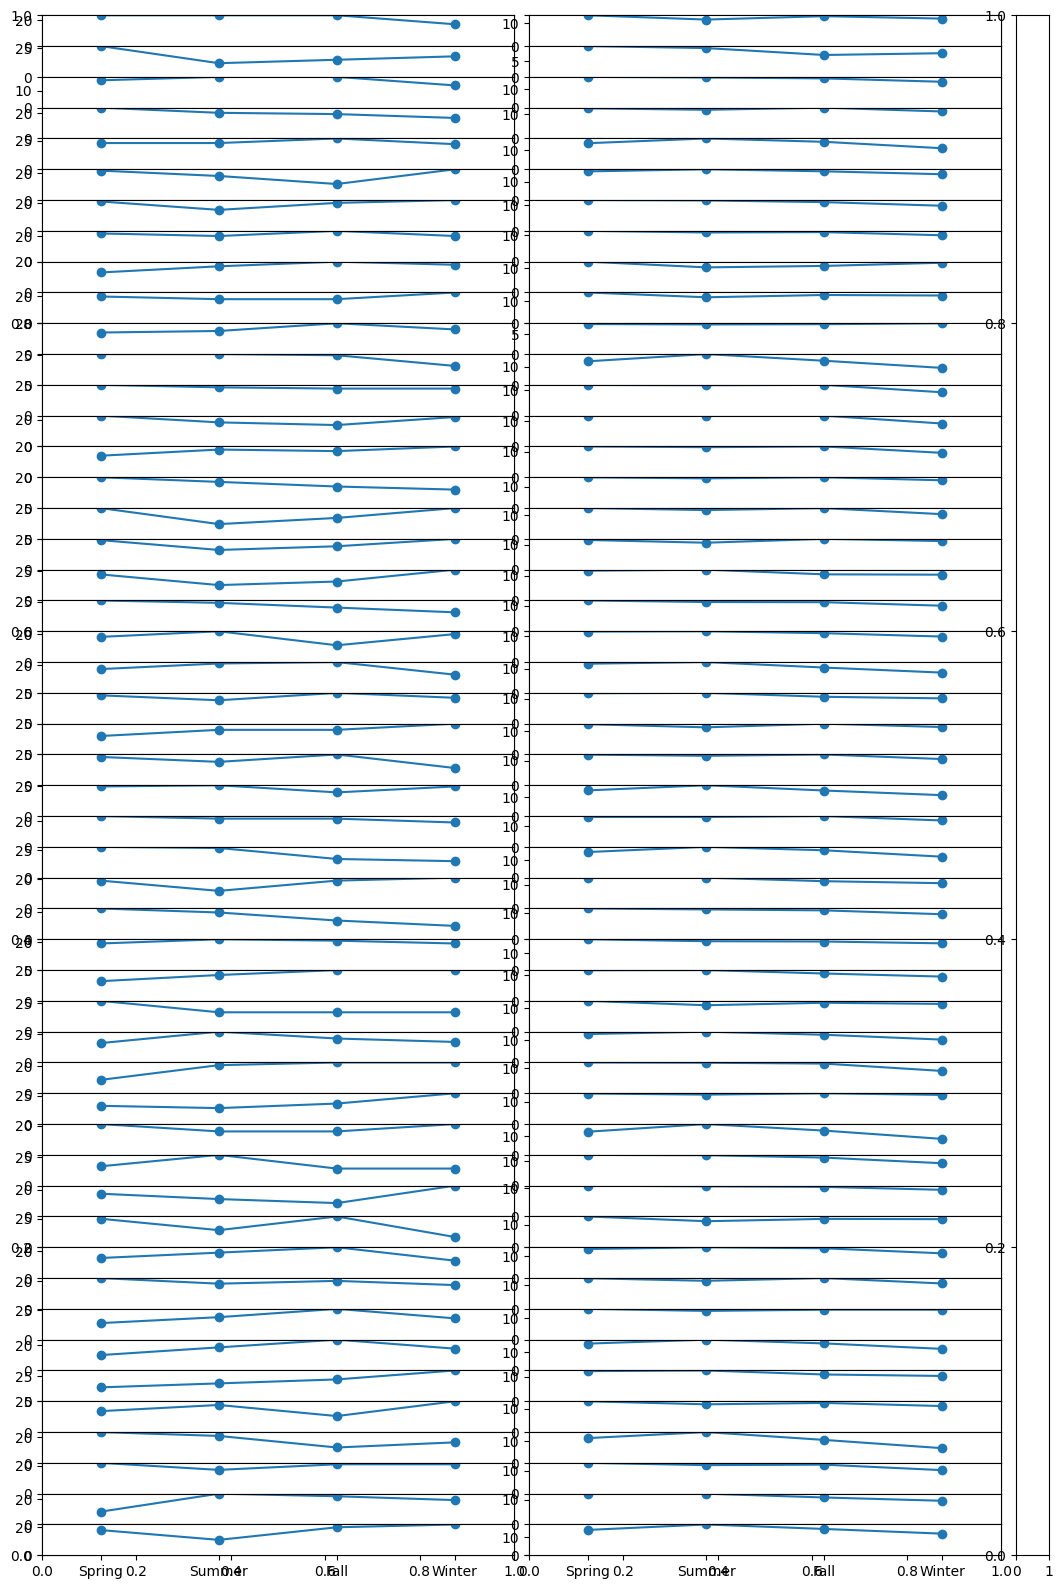

In [129]:
# Set the figure size here
heatmap_width = 10  # Width for the heatmap
line_chart_width = 3  # Width for the line charts
fig_width = heatmap_width + line_chart_width
heatmap_height = 20  # Adjust this as needed based on the number of rows/states

# Create the figure with an updated size that should accommodate the location labels
fig = plt.figure(figsize=(fig_width, heatmap_height))

# Create a subplot for the heatmap with appropriate width ratio
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.15,
                share_all=False,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="7%",
                cbar_pad=0.15,
                aspect=False)

# Plot the heatmap
# sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Reds", ax=grid[0],
            # cbar_ax=grid.cbar_axes[0], annot_kws={"size": 12})

# Adjust tick parameters to ensure the state names are visible and not too cramped
# grid[0].tick_params(labelsize=10, rotation=0)  # Adjust the label size as needed

# Plot the line charts, ensuring they are inverted to match the heatmap's order
for i, (idx, row) in enumerate(pivot_table.iterrows()):
    # Inverting the index to match the heatmap order
    inverted_i = len(pivot_table.index) - i - 1

    # Set the axis for the line chart, using the inverted index
    ax = grid[0].inset_axes([0, inverted_i/len(pivot_table.index), 1, 1/len(pivot_table.index)])

    # Plot the line chart on the inset axis
    ax.plot(row.index, row.values, marker='o')
    ax.set_xlim(-0.5, len(pivot_table.columns) - 0.5)
    ax.set_ylim(0, row.values.max())

    # Remove axis labels and ticks
    # ax.axis('off')


for i, (idx, row) in enumerate(temprange_mean.iterrows()):
    # Inverting the index to match the heatmap order
    inverted_i = len(temprange_mean.index) - i - 1

    # Set the axis for the line chart, using the inverted index
    ax2 = grid[1].inset_axes([0, inverted_i/len(temprange_mean.index), 1, 1/len(temprange_mean.index)])

    # Plot the line chart on the inset axis
    ax2.plot(row.index, row.values, marker='o')
    ax2.set_xlim(-0.5, len(temprange_mean.columns) - 0.5)
    ax2.set_ylim(0, row.values.max())

    # Remove axis labels and ticks
    # ax2.axis('off')

plt.show()


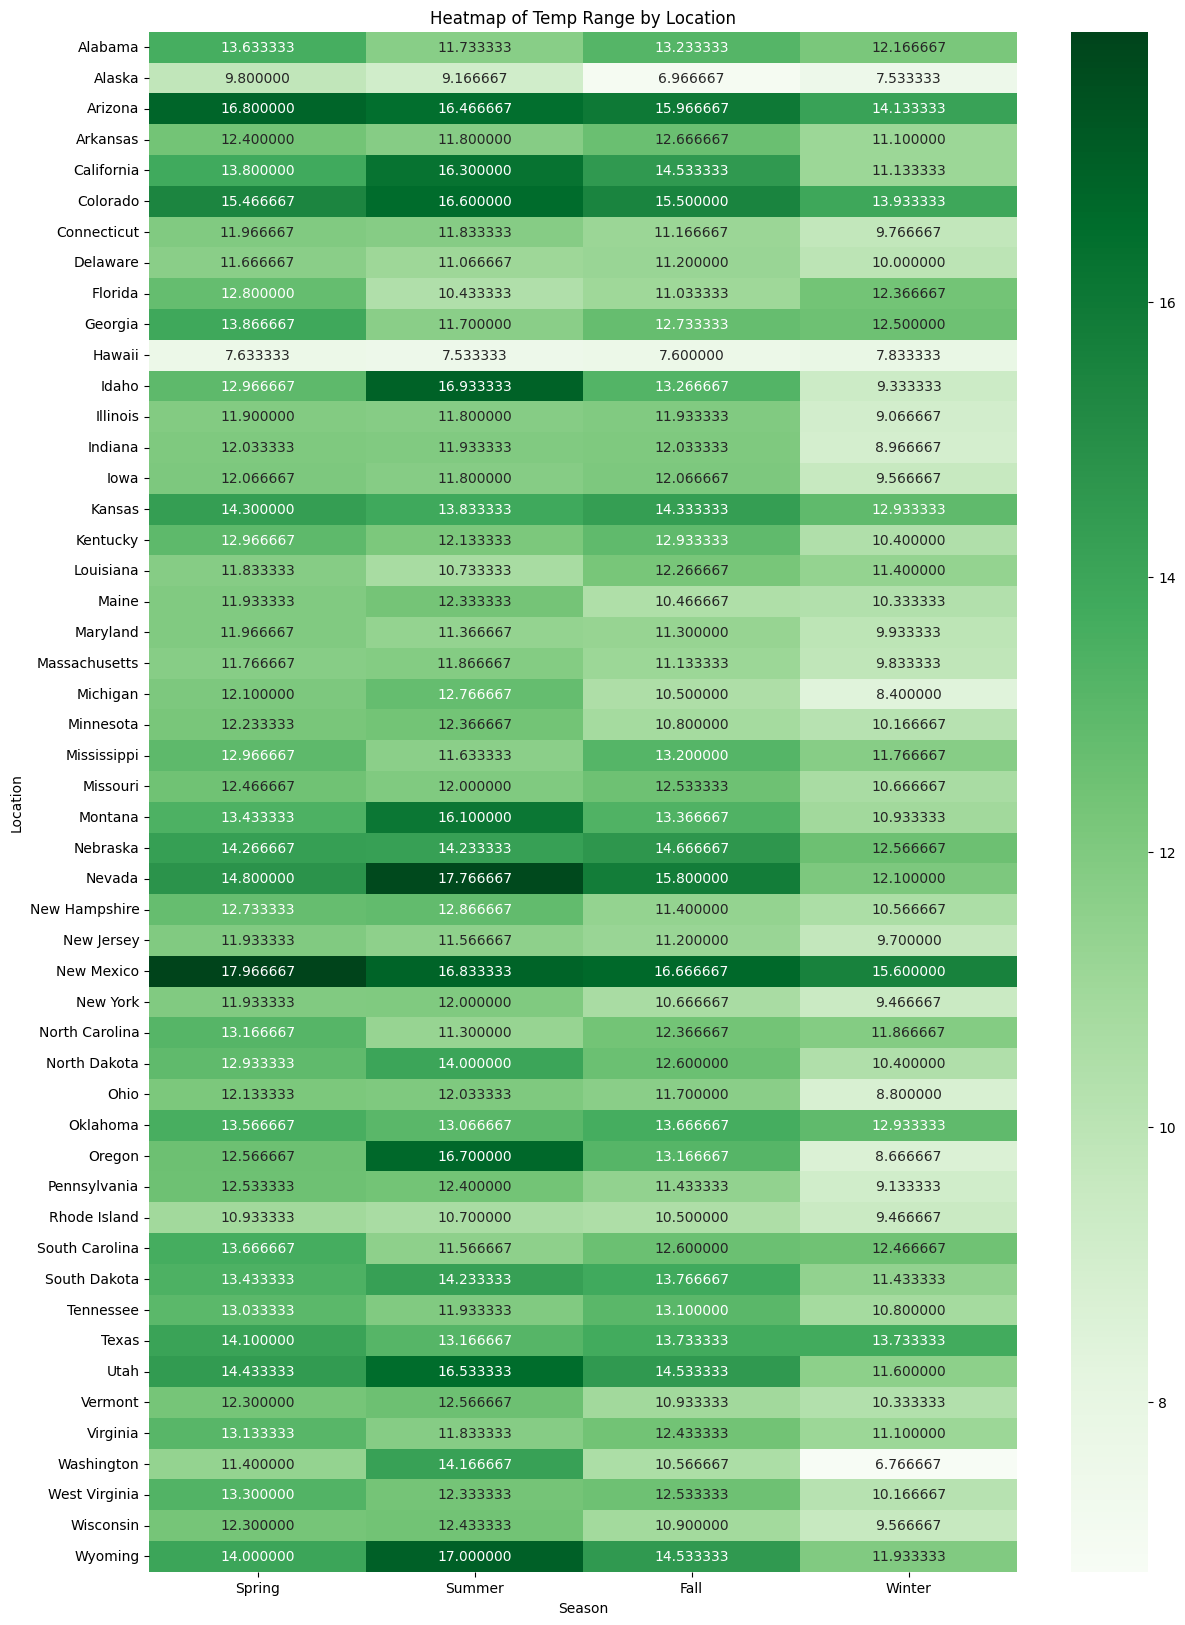

In [130]:
plt.figure(figsize=(14, 20))
sns.heatmap(temprange_mean, annot=True, fmt="f", cmap="Greens")
plt.title('Heatmap of Temp Range by Location')
plt.xlabel('Season')
plt.ylabel('Location')
plt.xticks(rotation=0)
plt.show()

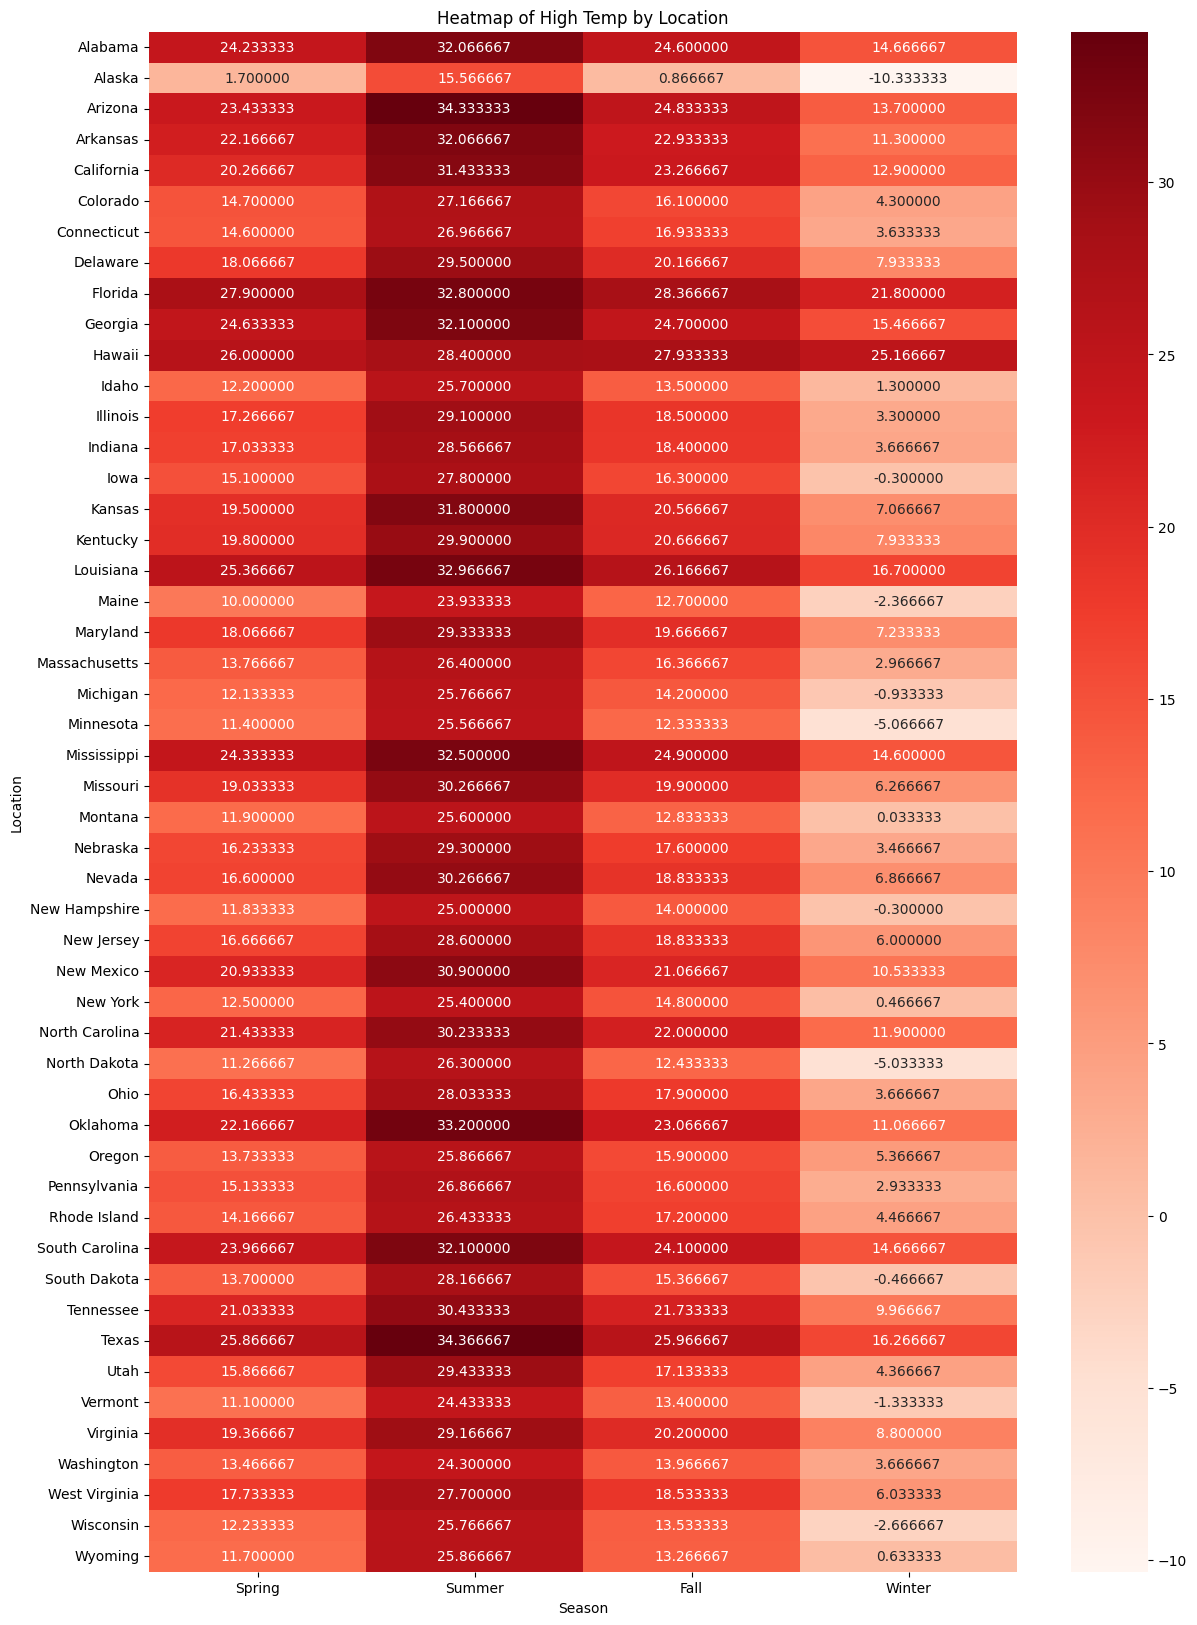

In [131]:
plt.figure(figsize=(14, 20))
sns.heatmap(high_mean, annot=True, fmt="f", cmap="Reds")
plt.title('Heatmap of High Temp by Location')
plt.xlabel('Season')
plt.ylabel('Location')
plt.xticks(rotation=0)
plt.show()

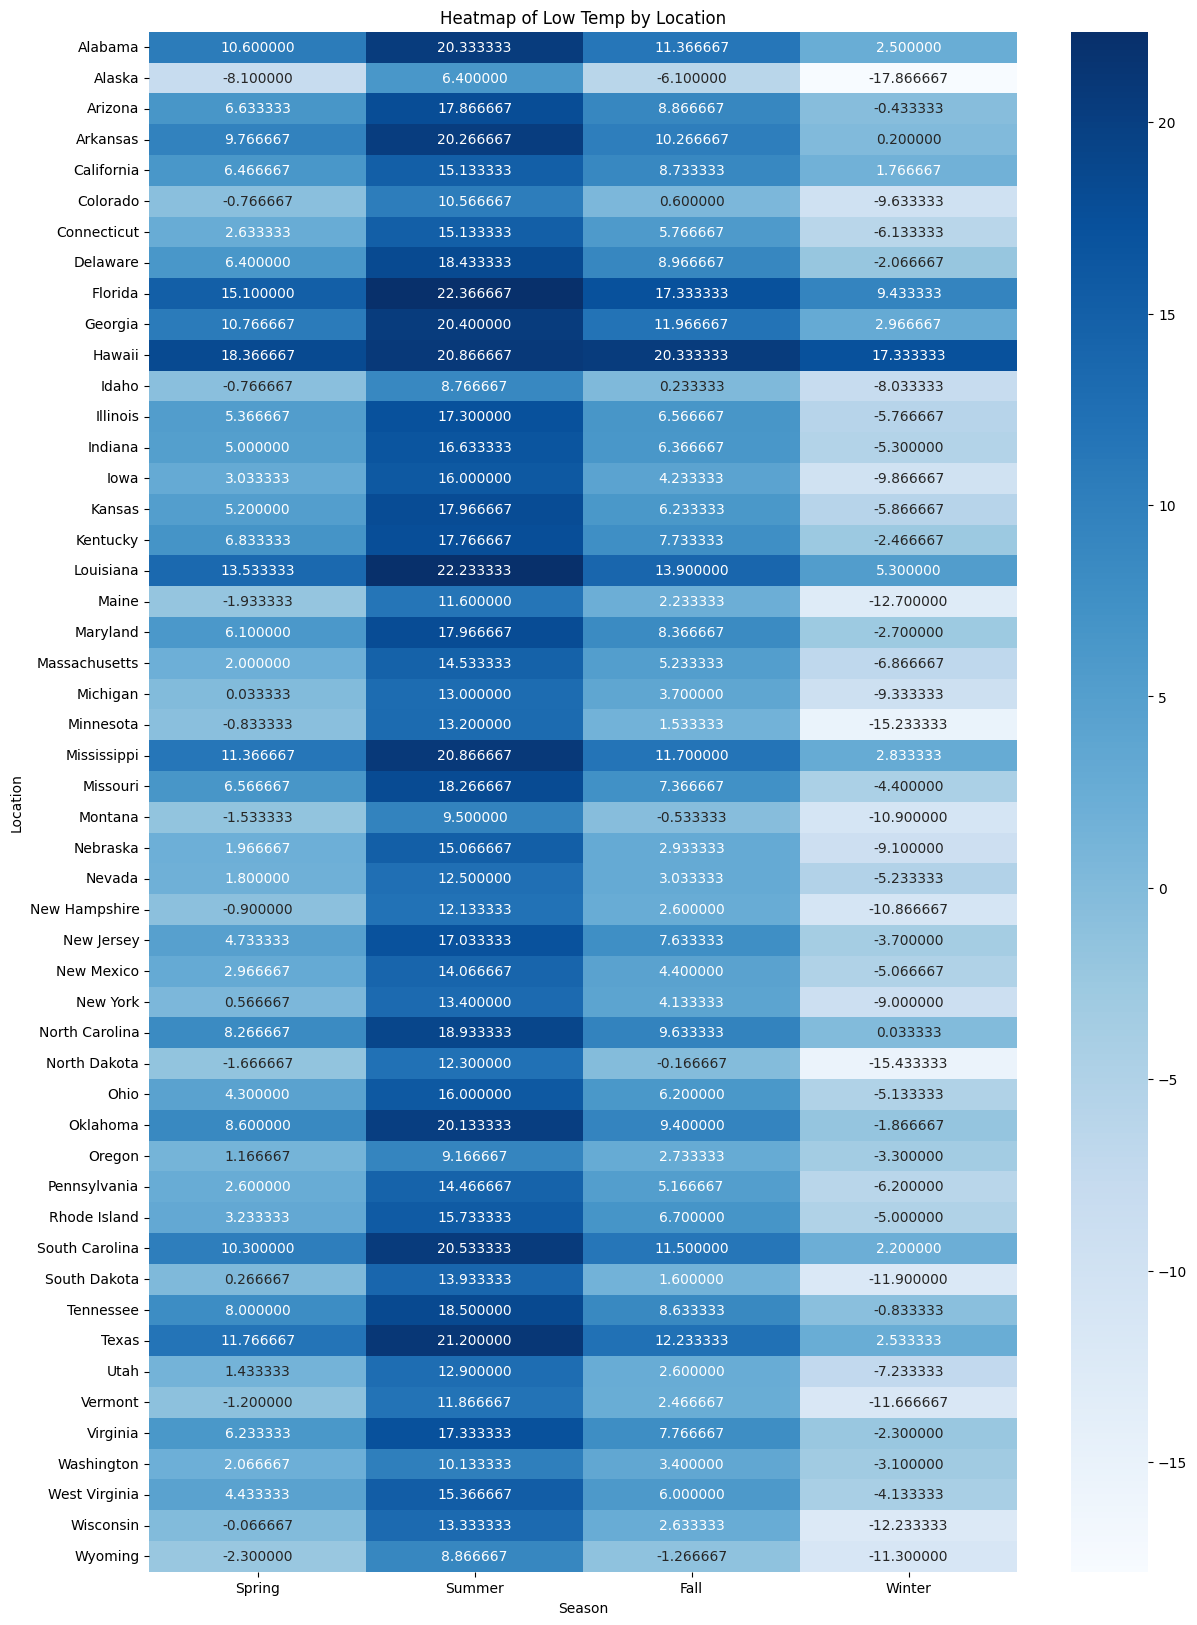

In [132]:
plt.figure(figsize=(14, 20))
sns.heatmap(low_mean, annot=True, fmt="f", cmap="Blues")
plt.title('Heatmap of Low Temp by Location')
plt.xlabel('Season')
plt.ylabel('Location')
plt.xticks(rotation=0)
plt.show()

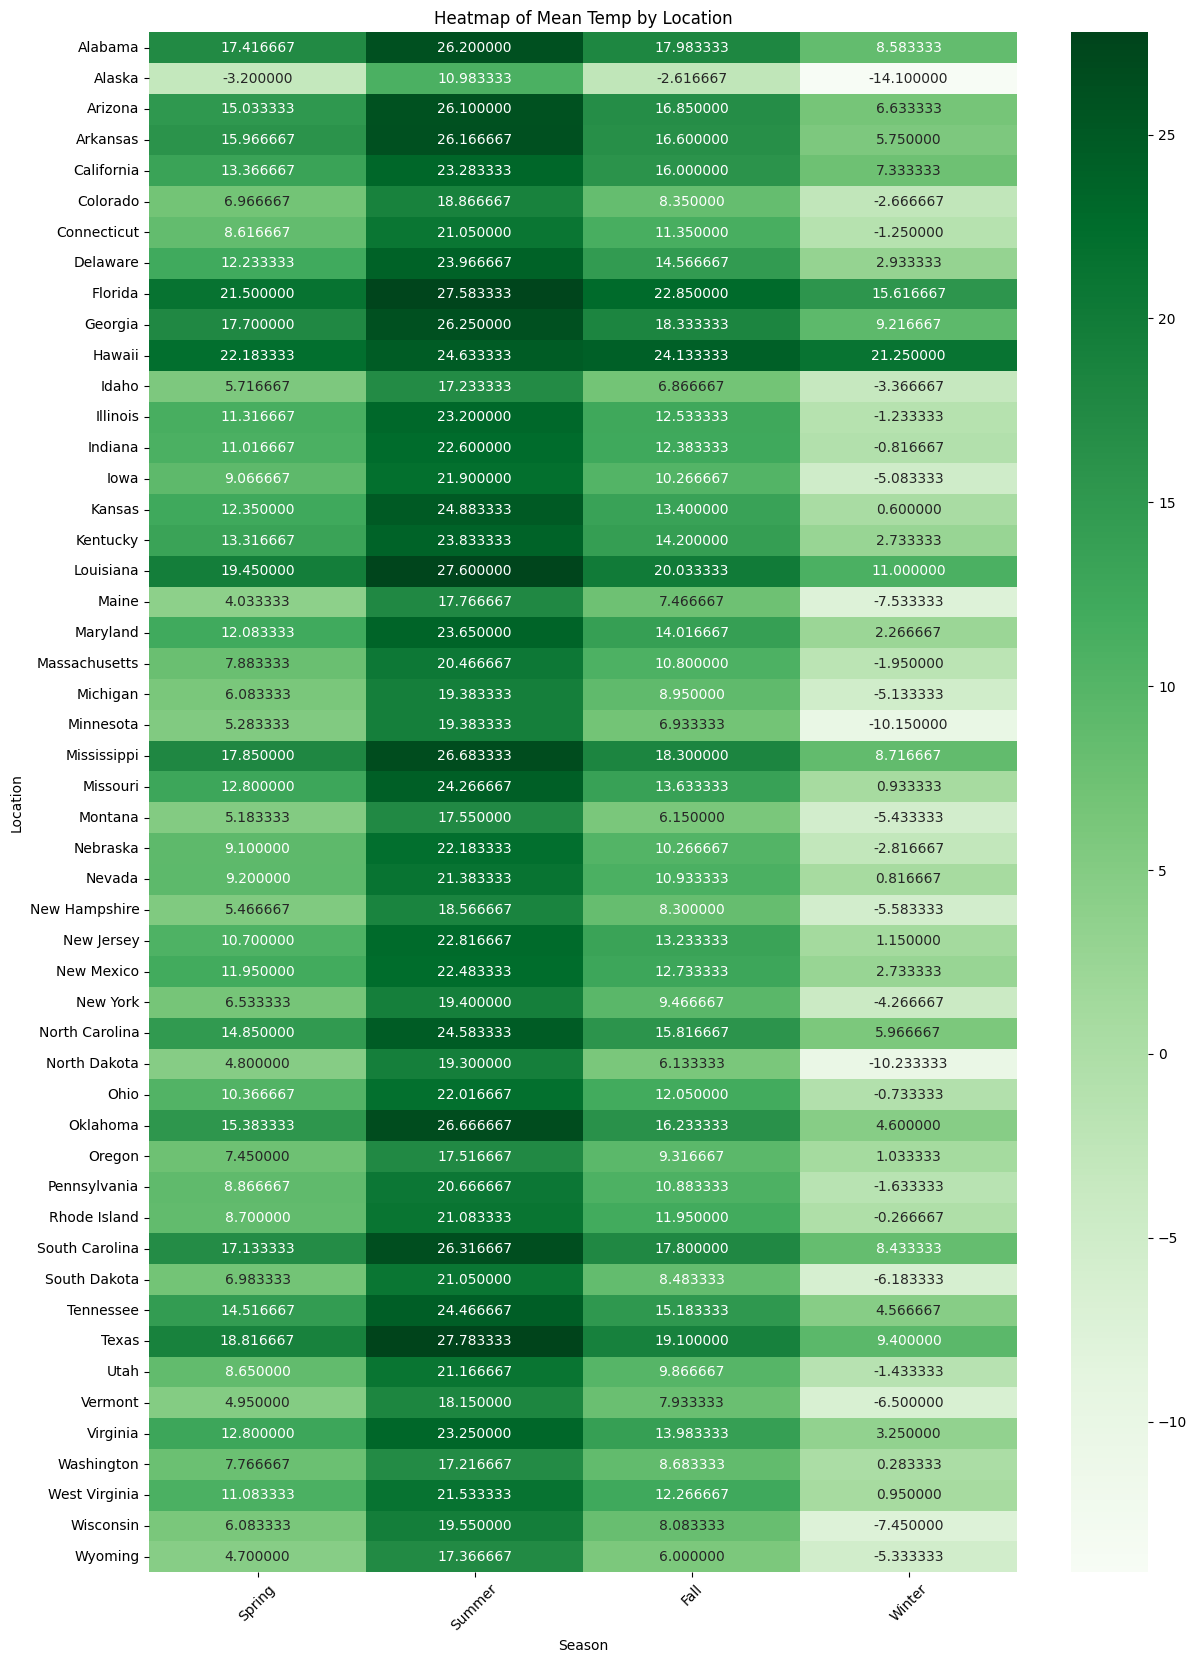

In [133]:
plt.figure(figsize=(14, 20))
sns.heatmap(mean_mean, annot=True, fmt="f", cmap="Greens")
plt.title('Heatmap of Mean Temp by Location')
plt.xlabel('Season')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

In [134]:
pivot_table.head()

Season      Spring  Summer  Fall  Winter
Location                                
Alabama         24      24    24      17
Alaska          27      12    15      18
Arizona         16      18    18      13
Arkansas        24      20    19      16
California      23      23    27      22

In [135]:
mean_mean.head()

Season         Spring     Summer       Fall     Winter
State                                                 
Alabama     17.416667  26.200000  17.983333   8.583333
Alaska      -3.200000  10.983333  -2.616667 -14.100000
Arizona     15.033333  26.100000  16.850000   6.633333
Arkansas    15.966667  26.166667  16.600000   5.750000
California  13.366667  23.283333  16.000000   7.333333

In [136]:
purchase_count = pivot_table.rename_axis(index={'Location': 'State'})
purchase_count.head()

Season      Spring  Summer  Fall  Winter
State                                   
Alabama         24      24    24      17
Alaska          27      12    15      18
Arizona         16      18    18      13
Arkansas        24      20    19      16
California      23      23    27      22

In [137]:
purchase_count_reset = purchase_count.reset_index()
purchase_count_reset.head()

Season       State  Spring  Summer  Fall  Winter
0          Alabama      24      24    24      17
1           Alaska      27      12    15      18
2          Arizona      16      18    18      13
3         Arkansas      24      20    19      16
4       California      23      23    27      22

In [138]:
mean_mean_reset = mean_mean.reset_index()
mean_mean_reset.head()

Season       State     Spring     Summer       Fall     Winter
0          Alabama  17.416667  26.200000  17.983333   8.583333
1           Alaska  -3.200000  10.983333  -2.616667 -14.100000
2          Arizona  15.033333  26.100000  16.850000   6.633333
3         Arkansas  15.966667  26.166667  16.600000   5.750000
4       California  13.366667  23.283333  16.000000   7.333333

In [139]:
from scipy.stats import pearsonr

# Step 1: Melt the purchase_count_reset DataFrame to long format
purchase_count_melted = purchase_count_reset.melt(id_vars='State', var_name='Season', value_name='Purchase_Count')

# Step 2: Melt the mean_temp_reset DataFrame to long format
mean_temp_melted = mean_mean_reset.melt(id_vars='State', var_name='Season', value_name='Mean_Temperature')

# Ensure that the 'Season' columns have the same string values in both dataframes before merging
purchase_count_melted['Season'] = purchase_count_melted['Season'].str.capitalize()
mean_temp_melted['Season'] = mean_temp_melted['Season'].str.capitalize()

# Step 3: Merge the melted DataFrames on 'State' and 'Season'
merged_df = pd.merge(purchase_count_melted, mean_temp_melted, on=['State', 'Season'])

# Step 4: Calculate the correlation for each state between temperature and purchase count
correlation_df = merged_df.groupby('State').apply(lambda group: pearsonr(group['Mean_Temperature'], group['Purchase_Count']))

# Convert the resulting series of tuples into a DataFrame
correlation_df = pd.DataFrame(correlation_df.tolist(), index=correlation_df.index, columns=['Correlation', 'P-value'])

# Reset index to make 'State' a column
correlation_df.reset_index(inplace=True)

correlation_df  # Display the first few rows

State  Correlation   P-value
0          Alabama     0.830104  0.169896
1           Alaska    -0.434854  0.565146
2          Arizona     0.880556  0.119444
3         Arkansas     0.488487  0.511513
4       California     0.265633  0.734367
5         Colorado    -0.448615  0.551385
6      Connecticut    -0.926331  0.073669
7         Delaware     0.043992  0.956008
8          Florida    -0.042127  0.957873
9          Georgia    -0.884483  0.115517
10          Hawaii     0.355342  0.644658
11           Idaho     0.810356  0.189644
12        Illinois     0.267075  0.732925
13         Indiana    -0.547404  0.452596
14            Iowa    -0.356991  0.643009
15          Kansas     0.555617  0.444383
16        Kentucky    -0.842720  0.157280
17       Louisiana    -0.876651  0.123349
18           Maine    -0.956043  0.043957
19        Maryland     0.686077  0.313923
20   Massachusetts     0.110071  0.889929
21        Michigan     0.853991  0.146009
22       Minnesota    -0.233713  0.766287
23     Mississippi    -0.507968  0.492032
24        Missouri     0.459049  0.540951
25         Montana     0.134309  0.865691
26        Nebraska     0.574980  0.425020
27          Nevada     0.661315  0.338685
28   New Hampshire    -0.915851  0.084149
29      New Jersey     0.619576  0.380424
30      New Mexico     0.840947  0.159053
31        New York    -0.282150  0.717850
32  North Carolina    -0.039784  0.960216
33    North Dakota     0.811175  0.188825
34            Ohio    -0.085579  0.914421
35        Oklahoma    -0.922764  0.077236
36          Oregon    -0.779934  0.220066
37    Pennsylvania     0.824951  0.175049
38    Rhode Island    -0.792150  0.207850
39  South Carolina     0.298952  0.701048
40    South Dakota     0.598014  0.401986
41       Tennessee     0.193204  0.806796
42           Texas     0.101754  0.898246
43            Utah     0.133937  0.866063
44         Vermont    -0.688043  0.311957
45        Virginia    -0.257393  0.742607
46      Washington     0.335719  0.664281
47   West Virginia    -0.726144  0.273856
48       Wisconsin     0.359426  0.640574
49         Wyoming    -0.938493  0.061507

In [140]:
significant_correlations = correlation_df[correlation_df['P-value'] < 0.05]
significant_correlations

State  Correlation   P-value
18  Maine    -0.956043  0.043957

In [141]:
temprange_mean_reset = temprange_mean.reset_index()

# Step 2: Melt the mean_temp_reset DataFrame to long format
temprange_mean_melted = temprange_mean_reset.melt(id_vars='State', var_name='Season', value_name='Mean_TempRange')

# Ensure that the 'Season' columns have the same string values in both dataframes before merging
purchase_count_melted['Season'] = purchase_count_melted['Season'].str.capitalize()
temprange_mean_melted['Season'] = temprange_mean_melted['Season'].str.capitalize()

# Step 3: Merge the melted DataFrames on 'State' and 'Season'
merged_df = pd.merge(purchase_count_melted, temprange_mean_melted, on=['State', 'Season'])

# Step 4: Calculate the correlation for each state between temperature and purchase count
correlation_df = merged_df.groupby('State').apply(lambda group: pearsonr(group['Mean_TempRange'], group['Purchase_Count']))

# Convert the resulting series of tuples into a DataFrame
correlation_df = pd.DataFrame(correlation_df.tolist(), index=correlation_df.index, columns=['Correlation', 'P-value'])

# Reset index to make 'State' a column
correlation_df.reset_index(inplace=True)

correlation_df  # Display the first few rows

State   Correlation   P-value
0          Alabama  3.934351e-01  0.606565
1           Alaska  4.737924e-01  0.526208
2          Arizona  7.858490e-01  0.214151
3         Arkansas  6.557010e-01  0.344299
4       California  3.624784e-01  0.637522
5         Colorado -4.625898e-01  0.537410
6      Connecticut -5.641598e-01  0.435840
7         Delaware  5.520624e-01  0.447938
8          Florida -5.848328e-01  0.415167
9          Georgia  2.101961e-01  0.789804
10          Hawaii -4.908807e-02  0.950912
11           Idaho  8.350308e-01  0.164969
12        Illinois  4.691603e-01  0.530840
13         Indiana -4.471222e-01  0.552878
14            Iowa -7.782688e-01  0.221731
15          Kansas  6.545361e-01  0.345464
16        Kentucky -3.001545e-01  0.699845
17       Louisiana  3.484002e-01  0.651600
18           Maine -4.786460e-01  0.521354
19        Maryland  9.342386e-01  0.065761
20   Massachusetts  2.747834e-02  0.972522
21        Michigan  6.363881e-01  0.363612
22       Minnesota -3.143073e-01  0.685693
23     Mississippi -6.076869e-01  0.392313
24        Missouri  9.625148e-01  0.037485
25         Montana  1.807996e-01  0.819200
26        Nebraska  8.268314e-01  0.173169
27          Nevada  6.125670e-01  0.387433
28   New Hampshire -7.247066e-01  0.275293
29      New Jersey  9.239373e-01  0.076063
30      New Mexico  3.330669e-16  1.000000
31        New York -7.910769e-01  0.208923
32  North Carolina  8.349490e-01  0.165051
33    North Dakota  6.639107e-01  0.336089
34            Ohio -4.809808e-01  0.519019
35        Oklahoma -4.688321e-01  0.531168
36          Oregon -7.574168e-01  0.242583
37    Pennsylvania  5.392677e-01  0.460732
38    Rhode Island -6.876282e-01  0.312372
39  South Carolina  5.418061e-01  0.458194
40    South Dakota  7.333627e-01  0.266637
41       Tennessee  8.933119e-01  0.106688
42           Texas -3.090125e-01  0.690988
43            Utah  1.092711e-01  0.890729
44         Vermont -8.994562e-01  0.100544
45        Virginia -7.891774e-01  0.210823
46      Washington  4.771596e-01  0.522840
47   West Virginia  2.423489e-02  0.975765
48       Wisconsin -1.812956e-01  0.818704
49         Wyoming -9.303802e-01  0.069620

In [142]:
significant_correlations = correlation_df[correlation_df['P-value'] < 0.05]
significant_correlations

State  Correlation   P-value
24  Missouri     0.962515  0.037485

In [143]:
high_mean_reset = high_mean.reset_index()

# Step 2: Melt the mean_temp_reset DataFrame to long format
high_mean_melted = high_mean_reset.melt(id_vars='State', var_name='Season', value_name='HighTemp')

# Ensure that the 'Season' columns have the same string values in both dataframes before merging
purchase_count_melted['Season'] = purchase_count_melted['Season'].str.capitalize()
high_mean_melted['Season'] = high_mean_melted['Season'].str.capitalize()

# Step 3: Merge the melted DataFrames on 'State' and 'Season'
merged_df = pd.merge(purchase_count_melted, high_mean_melted, on=['State', 'Season'])

# Step 4: Calculate the correlation for each state between temperature and purchase count
correlation_df = merged_df.groupby('State').apply(lambda group: pearsonr(group['HighTemp'], group['Purchase_Count']))

# Convert the resulting series of tuples into a DataFrame
correlation_df = pd.DataFrame(correlation_df.tolist(), index=correlation_df.index, columns=['Correlation', 'P-value'])

# Reset index to make 'State' a column
correlation_df.reset_index(inplace=True)

correlation_df  # Display the first few rows

State  Correlation   P-value
0          Alabama     0.862442  0.137558
1           Alaska    -0.391320  0.608680
2          Arizona     0.888175  0.111825
3         Arkansas     0.506304  0.493696
4       California     0.279688  0.720312
5         Colorado    -0.449721  0.550279
6      Connecticut    -0.916834  0.083166
7         Delaware     0.064916  0.935084
8          Florida    -0.117725  0.882275
9          Georgia    -0.890265  0.109735
10          Hawaii     0.366545  0.633455
11           Idaho     0.814297  0.185703
12        Illinois     0.283419  0.716581
13         Indiana    -0.546582  0.453418
14            Iowa    -0.382816  0.617184
15          Kansas     0.566318  0.433682
16        Kentucky    -0.827103  0.172897
17       Louisiana    -0.874716  0.125284
18           Maine    -0.945918  0.054082
19        Maryland     0.708703  0.291297
20   Massachusetts     0.106845  0.893155
21        Michigan     0.843237  0.156763
22       Minnesota    -0.239062  0.760938
23     Mississippi    -0.541572  0.458428
24        Missouri     0.487917  0.512083
25         Montana     0.139023  0.860977
26        Nebraska     0.592497  0.407503
27          Nevada     0.656539  0.343461
28   New Hampshire    -0.915368  0.084632
29      New Jersey     0.643907  0.356093
30      New Mexico     0.816098  0.183902
31        New York    -0.315054  0.684946
32  North Carolina     0.003705  0.996295
33    North Dakota     0.803583  0.196417
34            Ohio    -0.118017  0.881983
35        Oklahoma    -0.928919  0.071081
36          Oregon    -0.776343  0.223657
37    Pennsylvania     0.812543  0.187457
38    Rhode Island    -0.795954  0.204046
39  South Carolina     0.339158  0.660842
40    South Dakota     0.607021  0.392979
41       Tennessee     0.245076  0.754924
42           Texas     0.095236  0.904764
43            Utah     0.131649  0.868351
44         Vermont    -0.705996  0.294004
45        Virginia    -0.293592  0.706408
46      Washington     0.362538  0.637462
47   West Virginia    -0.686631  0.313369
48       Wisconsin     0.331143  0.668857
49         Wyoming    -0.937780  0.062220

In [144]:
significant_correlations = correlation_df[correlation_df['P-value'] < 0.05]
significant_correlations

Empty DataFrame
Columns: [State, Correlation, P-value]
Index: []

In [145]:
low_mean_reset = low_mean.reset_index()

# Step 2: Melt the mean_temp_reset DataFrame to long format
low_mean_melted = low_mean_reset.melt(id_vars='State', var_name='Season', value_name='LowTemp')

# Ensure that the 'Season' columns have the same string values in both dataframes before merging
purchase_count_melted['Season'] = purchase_count_melted['Season'].str.capitalize()
low_mean_melted['Season'] = low_mean_melted['Season'].str.capitalize()

# Step 3: Merge the melted DataFrames on 'State' and 'Season'
merged_df = pd.merge(purchase_count_melted, low_mean_melted, on=['State', 'Season'])

# Step 4: Calculate the correlation for each state between temperature and purchase count
correlation_df = merged_df.groupby('State').apply(lambda group: pearsonr(group['LowTemp'], group['Purchase_Count']))

# Convert the resulting series of tuples into a DataFrame
correlation_df = pd.DataFrame(correlation_df.tolist(), index=correlation_df.index, columns=['Correlation', 'P-value'])

# Reset index to make 'State' a column
correlation_df.reset_index(inplace=True)

correlation_df  # Display the first few rowsv

State  Correlation   P-value
0          Alabama     0.795453  0.204547
1           Alaska    -0.479699  0.520301
2          Arizona     0.869800  0.130200
3         Arkansas     0.469309  0.530691
4       California     0.245970  0.754030
5         Colorado    -0.447323  0.552677
6      Connecticut    -0.935616  0.064384
7         Delaware     0.022002  0.977998
8          Florida     0.021824  0.978176
9          Georgia    -0.875878  0.124122
10          Hawaii     0.344810  0.655190
11           Idaho     0.804572  0.195428
12        Illinois     0.248273  0.751727
13         Indiana    -0.547167  0.452833
14            Iowa    -0.328403  0.671597
15          Kansas     0.544094  0.455906
16        Kentucky    -0.857059  0.142941
17       Louisiana    -0.876799  0.123201
18           Maine    -0.965747  0.034253
19        Maryland     0.660980  0.339020
20   Massachusetts     0.113503  0.886497
21        Michigan     0.864710  0.135290
22       Minnesota    -0.227796  0.772204
23     Mississippi    -0.472971  0.527029
24        Missouri     0.427853  0.572147
25         Montana     0.128397  0.871603
26        Nebraska     0.555680  0.444320
27          Nevada     0.667097  0.332903
28   New Hampshire    -0.915270  0.084730
29      New Jersey     0.592298  0.407702
30      New Mexico     0.864897  0.135103
31        New York    -0.245406  0.754594
32  North Carolina    -0.081803  0.918197
33    North Dakota     0.819592  0.180408
34            Ohio    -0.047955  0.952045
35        Oklahoma    -0.916205  0.083795
36          Oregon    -0.784963  0.215037
37    Pennsylvania     0.837194  0.162806
38    Rhode Island    -0.787620  0.212380
39  South Carolina     0.259958  0.740042
40    South Dakota     0.587785  0.412215
41       Tennessee     0.137438  0.862562
42           Texas     0.108035  0.891965
43            Utah     0.136734  0.863266
44         Vermont    -0.667763  0.332237
45        Virginia    -0.219242  0.780758
46      Washington     0.293221  0.706779
47   West Virginia    -0.767341  0.232659
48       Wisconsin     0.390385  0.609615
49         Wyoming    -0.939352  0.060648

In [146]:
significant_correlations = correlation_df[correlation_df['P-value'] < 0.05]
significant_correlations

State  Correlation   P-value
18  Maine    -0.965747  0.034253

In [147]:
mean_mean

Season             Spring     Summer       Fall     Winter
State                                                     
Alabama         17.416667  26.200000  17.983333   8.583333
Alaska          -3.200000  10.983333  -2.616667 -14.100000
Arizona         15.033333  26.100000  16.850000   6.633333
Arkansas        15.966667  26.166667  16.600000   5.750000
California      13.366667  23.283333  16.000000   7.333333
Colorado         6.966667  18.866667   8.350000  -2.666667
Connecticut      8.616667  21.050000  11.350000  -1.250000
Delaware        12.233333  23.966667  14.566667   2.933333
Florida         21.500000  27.583333  22.850000  15.616667
Georgia         17.700000  26.250000  18.333333   9.216667
Hawaii          22.183333  24.633333  24.133333  21.250000
Idaho            5.716667  17.233333   6.866667  -3.366667
Illinois        11.316667  23.200000  12.533333  -1.233333
Indiana         11.016667  22.600000  12.383333  -0.816667
Iowa             9.066667  21.900000  10.266667  -5.083333
Kansas          12.350000  24.883333  13.400000   0.600000
Kentucky        13.316667  23.833333  14.200000   2.733333
Louisiana       19.450000  27.600000  20.033333  11.000000
Maine            4.033333  17.766667   7.466667  -7.533333
Maryland        12.083333  23.650000  14.016667   2.266667
Massachusetts    7.883333  20.466667  10.800000  -1.950000
Michigan         6.083333  19.383333   8.950000  -5.133333
Minnesota        5.283333  19.383333   6.933333 -10.150000
Mississippi     17.850000  26.683333  18.300000   8.716667
Missouri        12.800000  24.266667  13.633333   0.933333
Montana          5.183333  17.550000   6.150000  -5.433333
Nebraska         9.100000  22.183333  10.266667  -2.816667
Nevada           9.200000  21.383333  10.933333   0.816667
New Hampshire    5.466667  18.566667   8.300000  -5.583333
New Jersey      10.700000  22.816667  13.233333   1.150000
New Mexico      11.950000  22.483333  12.733333   2.733333
New York         6.533333  19.400000   9.466667  -4.266667
North Carolina  14.850000  24.583333  15.816667   5.966667
North Dakota     4.800000  19.300000   6.133333 -10.233333
Ohio            10.366667  22.016667  12.050000  -0.733333
Oklahoma        15.383333  26.666667  16.233333   4.600000
Oregon           7.450000  17.516667   9.316667   1.033333
Pennsylvania     8.866667  20.666667  10.883333  -1.633333
Rhode Island     8.700000  21.083333  11.950000  -0.266667
South Carolina  17.133333  26.316667  17.800000   8.433333
South Dakota     6.983333  21.050000   8.483333  -6.183333
Tennessee       14.516667  24.466667  15.183333   4.566667
Texas           18.816667  27.783333  19.100000   9.400000
Utah             8.650000  21.166667   9.866667  -1.433333
Vermont          4.950000  18.150000   7.933333  -6.500000
Virginia        12.800000  23.250000  13.983333   3.250000
Washington       7.766667  17.216667   8.683333   0.283333
West Virginia   11.083333  21.533333  12.266667   0.950000
Wisconsin        6.083333  19.550000   8.083333  -7.450000
Wyoming          4.700000  17.366667   6.000000  -5.333333

In [148]:
mean_mean.iloc[:,0]

State
Alabama           17.416667
Alaska            -3.200000
Arizona           15.033333
Arkansas          15.966667
California        13.366667
Colorado           6.966667
Connecticut        8.616667
Delaware          12.233333
Florida           21.500000
Georgia           17.700000
Hawaii            22.183333
Idaho              5.716667
Illinois          11.316667
Indiana           11.016667
Iowa               9.066667
Kansas            12.350000
Kentucky          13.316667
Louisiana         19.450000
Maine              4.033333
Maryland          12.083333
Massachusetts      7.883333
Michigan           6.083333
Minnesota          5.283333
Mississippi       17.850000
Missouri          12.800000
Montana            5.183333
Nebraska           9.100000
Nevada             9.200000
New Hampshire      5.466667
New Jersey        10.700000
New Mexico        11.950000
New York           6.533333
North Carolina    14.850000
North Dakota       4.800000
Ohio              10.366667
Oklahoma          15.383333
Oregon             7.450000
Pennsylvania       8.866667
Rhode Island       8.700000
South Carolina    17.133333
South Dakota       6.983333
Tennessee         14.516667
Texas             18.816667
Utah               8.650000
Vermont            4.950000
Virginia          12.800000
Washington         7.766667
West Virginia     11.083333
Wisconsin          6.083333
Wyoming            4.700000
Name: Spring, dtype: float64

In [149]:
TempCompare = mean_mean.copy()  # Copy the original DataFrame
# TempCompare['Spring-Winter'] = TempCompare['Spring'] - TempCompare['Winter']
# TempCompare['Summer-Spring'] = TempCompare['Summer'] - TempCompare['Spring']
# TempCompare['Fall-Summer'] = TempCompare['Fall'] - TempCompare['Summer']
# TempCompare['Winter-Fall'] = TempCompare['Winter'] - TempCompare['Fall']
TempCompare['Spring'] = mean_mean['Spring'] - mean_mean['Winter']
TempCompare['Summer'] = mean_mean['Summer'] - mean_mean['Spring']
TempCompare['Fall'] = mean_mean['Fall'] - mean_mean['Summer']
TempCompare['Winter'] = mean_mean['Winter'] - mean_mean['Fall']

# Drop the original season columns as they are no longer needed in TempCompare
# TempCompare.drop(columns=['Spring', 'Summer', 'Fall', 'Winter'], inplace=True)

TempCompare.head()  # Show the first few rows of the new DataFrame

Season         Spring     Summer       Fall     Winter
State                                                 
Alabama      8.833333   8.783333  -8.216667  -9.400000
Alaska      10.900000  14.183333 -13.600000 -11.483333
Arizona      8.400000  11.066667  -9.250000 -10.216667
Arkansas    10.216667  10.200000  -9.566667 -10.850000
California   6.033333   9.916667  -7.283333  -8.666667

In [150]:
TempCompare_reset = TempCompare.reset_index()

# Step 2: Melt the mean_temp_reset DataFrame to long format
TempCompare_melted = TempCompare_reset.melt(id_vars='State', var_name='Season', value_name='TempCompare')

# Ensure that the 'Season' columns have the same string values in both dataframes before merging
purchase_count_melted['Season'] = purchase_count_melted['Season'].str.capitalize()
TempCompare_melted['Season'] = TempCompare_melted['Season'].str.capitalize()

# Step 3: Merge the melted DataFrames on 'State' and 'Season'
merged_df = pd.merge(purchase_count_melted, TempCompare_melted, on=['State', 'Season'])

# Step 4: Calculate the correlation for each state between temperature and purchase count
correlation_df = merged_df.groupby('State').apply(lambda group: pearsonr(group['TempCompare'], group['Purchase_Count']))

# Convert the resulting series of tuples into a DataFrame
correlation_df = pd.DataFrame(correlation_df.tolist(), index=correlation_df.index, columns=['Correlation', 'P-value'])

# Reset index to make 'State' a column
correlation_df.reset_index(inplace=True)

correlation_df  # Display the first few rowsv

State  Correlation   P-value
0          Alabama     0.615437  0.384563
1           Alaska     0.189930  0.810070
2          Arizona     0.428047  0.571953
3         Arkansas     0.802302  0.197698
4       California    -0.328667  0.671333
5         Colorado     0.249313  0.750687
6      Connecticut    -0.640542  0.359458
7         Delaware    -0.270700  0.729300
8          Florida    -0.728976  0.271024
9          Georgia    -0.409989  0.590011
10          Hawaii    -0.352935  0.647065
11           Idaho     0.648156  0.351844
12        Illinois     0.824173  0.175827
13         Indiana     0.199176  0.800824
14            Iowa    -0.644173  0.355827
15          Kansas     0.907325  0.092675
16        Kentucky    -0.254682  0.745318
17       Louisiana    -0.297793  0.702207
18           Maine    -0.470045  0.529955
19        Maryland     0.922645  0.077355
20   Massachusetts     0.489647  0.510353
21        Michigan     0.326072  0.673928
22       Minnesota    -0.354508  0.645492
23     Mississippi    -0.735753  0.264247
24        Missouri     0.239835  0.760165
25         Montana     0.642526  0.357474
26        Nebraska     0.705906  0.294094
27          Nevada     0.972993  0.027007
28   New Hampshire    -0.718199  0.281801
29      New Jersey     0.936059  0.063941
30      New Mexico     0.235541  0.764459
31        New York    -0.841952  0.158048
32  North Carolina     0.550238  0.449762
33    North Dakota     0.329027  0.670973
34            Ohio    -0.679115  0.320885
35        Oklahoma    -0.780960  0.219040
36          Oregon    -0.111882  0.888118
37    Pennsylvania     0.729469  0.270531
38    Rhode Island    -0.280182  0.719818
39  South Carolina     0.155878  0.844122
40    South Dakota    -0.071263  0.928737
41       Tennessee     0.416268  0.583732
42           Texas    -0.617074  0.382926
43            Utah    -0.605210  0.394790
44         Vermont    -0.875708  0.124292
45        Virginia     0.018703  0.981297
46      Washington     0.903046  0.096954
47   West Virginia    -0.399568  0.600432
48       Wisconsin    -0.305527  0.694473
49         Wyoming    -0.829932  0.170068

In [151]:
significant_correlations = correlation_df[correlation_df['P-value'] < 0.05]
significant_correlations

State  Correlation   P-value
27  Nevada     0.972993  0.027007

#### Lack of Natural Variation in the Dataset

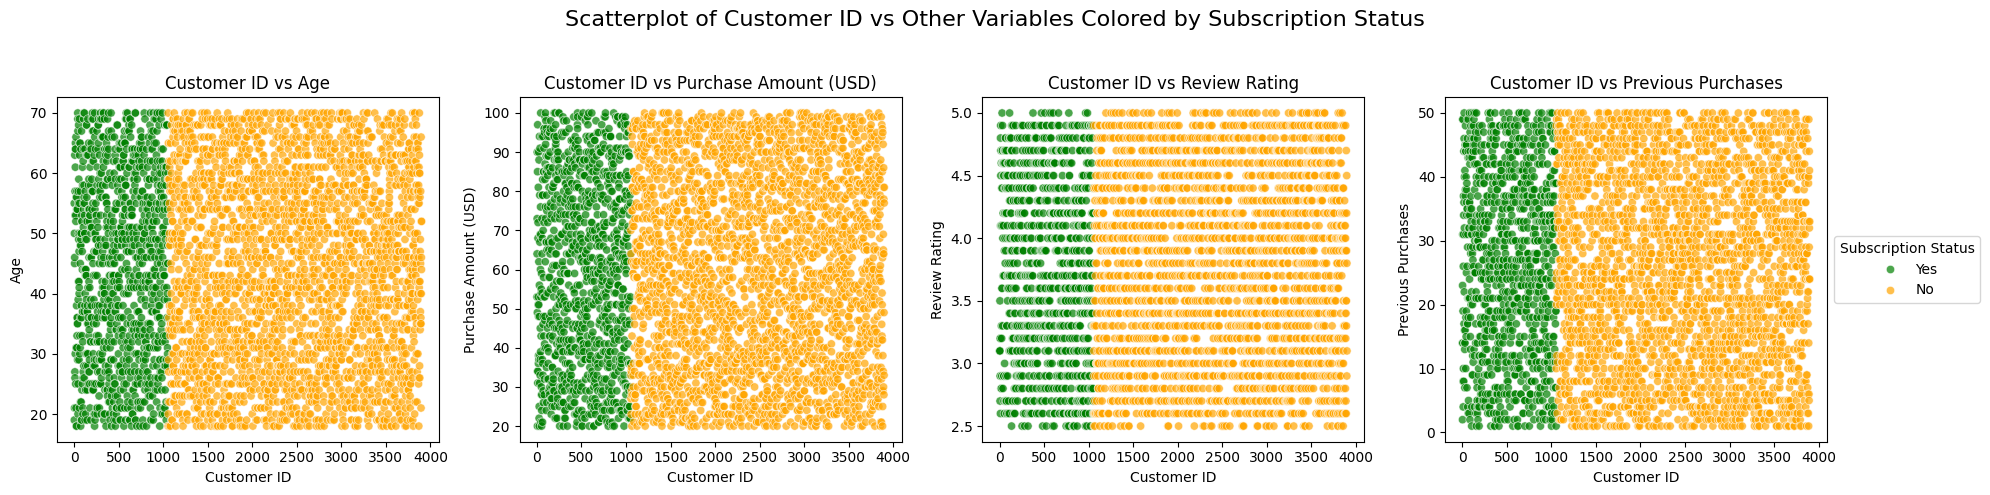

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

fig, axes = plt.subplots(1, len(variables), figsize=(20, 5), sharex=True)

for i, var in enumerate(variables):
    sns.scatterplot(
        data=df,
        x='Customer ID',
        y=var,
        hue='Subscription Status',
        palette={'Yes': 'green', 'No': 'orange'},
        alpha=0.7,
        edgecolor='white',
        linewidth=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'Customer ID vs {var}')
    axes[i].legend().remove()  # 범례는 마지막에만 표시

handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, title='Subscription Status', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Scatterplot of Customer ID vs Other Variables Colored by Subscription Status', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()